# Evaluating BGP catchment on Tangled testbed 
# Playbook build and Analisys
* Joao Ceron - ceron@botlog.org
* Leandro Bertholdo - leandro.bertholdo@gmail.com

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
plt.style.use('default')
from IPython.core.display import display, HTML
%matplotlib inline
from matplotlib import ticker
import os.path
import re
import numpy as pynum_float
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-f331077c0a13>:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# convert names to airport code
di = {"UK-LND": "LHR", 
      'US-MIA':"MIA", 
      "AU-SYD":"SYD",
      'FR-PAR': "CDG",
      'baseline': 'baseline'
     }

---
---
<h1 align="center">Functions</h1>

---
---

In [3]:
def init_fig():
    
    fig = plt.figure(figsize=(12, 5))
    ax = plt.subplot(111)   
    ax = plt.subplot2grid((1,1), (0,0))
    ax.set_facecolor("#ffffff")
    ax.spines['bottom'].set_color('0.5')
    ax.spines['top'].set_color('0.5')
    ax.spines['right'].set_color('0.5')
    ax.spines['left'].set_color('0.5')
    fig.tight_layout();
    plt.style.use('default')
    
    return (fig,ax)

In [4]:
def get_and_plot_reference_value(df,site):

    
    df_site = df[df['site']==site].sort_values(by="bgp")
    reference_value = df_site[df_site.bgp=="baseline"].iloc[0,2]
    label = "[{}%] BASELINE".format(int(reference_value))
    # reference value annotation
    ax.annotate(label,xy=(25, reference_value), ha='right',color='black',va='bottom')
    # reference value line
    ax.axhline(y=reference_value, xmin=-1, xmax=1.0, color='grey', linestyle='dotted')

    return (reference_value)

# Read files and build dataframe

In [5]:
df_all = pd.DataFrame()
df_raw = pd.DataFrame()
dir   = "./load-2019-10-09-1570664389/*load*.txt"
for file in (glob.glob(dir)):
    
    filename = os.path.basename(file)
    print (filename)
    
    # get baseline file - anycast with no prepends 
    if (bool(re.search('baseline', filename))):           
        df = pd.read_csv(file,names=['data'],skiprows=1)  
        df = df.data.str.split("█",expand=True)[0].str.split("[|\-]",expand=True)
        df_raw['site'] = df.iloc[:,0].str.upper() + "-" +  df.iloc[:,1].str.upper()
        df_raw['count'] = df.iloc[:,3].astype(int)
        df_raw['percent'] = df_raw['count']/df_raw['count'].sum()*100
        df_raw['bgp'] = "baseline"
        df_raw['site'] = df_raw.site.map(di)

    # get other files - with prepends
    else:
        bgp = file.split(".")[0].split("-") 
        bgp_policy = filename.split(".")[0].split("-")[2]
        bgp_site = filename.split(".")[0].split("-")[3].upper()+"-"+filename.split(".")[0].split("-")[4].upper()
        bgp = filename.split(".")[0].split("-")[2]+filename.split(".")[0].split("-")[3].upper()+"-"+filename.split(".")[0].split("-")[4].upper()
        df = pd.read_csv(file,names=['data'],skiprows=1)  
        df = df.data.str.split("█",expand=True)[0].str.split("[|\-]",expand=True)
        df_raw['site'] = df.iloc[:,0].str.upper() + "-" +  df.iloc[:,1].str.upper()
        df_raw['count'] = df.iloc[:,3].astype(int)
        df_raw['bgp_policy'] = bgp_policy
        df_raw['bgp_site'] = bgp_site

        df_raw['percent'] = df_raw['count']/df_raw['count'].sum()*100
        df_raw['bgp'] = bgp
        df_raw['site'] = df_raw.site.map(di)
        df_raw['bgp_site'] = df_raw.bgp_site.map(di)
        df_raw['bgp'] = df_raw['bgp_policy']+df_raw['bgp_site']
        df_raw.drop(['bgp_site','bgp_policy'],axis=1,inplace=True)
    df_all = pd.concat([df_raw, df_all],sort=False)

load-prepend-5x-fr-par.txt
load-prepend-8x-au-syd.txt
load-prepend-1x-au-syd.txt
load-prepend-2x-us-mia.txt
load-prepend-4x-au-syd.txt
load-prepend-7x-us-mia.txt
baseline-CDG,LHR,MIA,SYD.load.txt
load-prepend-5x-uk-lnd.txt
load-prepend-3x-fr-par.txt
load-prepend-4x-us-mia.txt
load-prepend-7x-au-syd.txt
load-prepend-1x-us-mia.txt
load-prepend-2x-au-syd.txt
load-prepend-3x-uk-lnd.txt
load-prepend-8x-us-mia.txt
load-prepend-4x-uk-lnd.txt
load-prepend-1x-fr-par.txt
load-prepend-6x-us-mia.txt
load-prepend-5x-au-syd.txt
load-prepend-3x-us-mia.txt
load-prepend-1x-uk-lnd.txt
load-prepend-4x-fr-par.txt
load-prepend-2x-uk-lnd.txt
load-prepend-3x-au-syd.txt
load-prepend-6x-au-syd.txt
load-prepend-5x-us-mia.txt
load-prepend-2x-fr-par.txt


In [6]:
df_all

site    count    percent    bgp
0   LHR  1696223  47.157127  2xCDG
1   MIA  1102886  30.661614  2xCDG
2   SYD   749233  20.829617  2xCDG
3   CDG    48618   1.351641  2xCDG
0   LHR  1843011  50.667415  5xMIA
..  ...      ...        ...    ...
3   SYD    30786   0.849313  8xSYD
0   LHR  1664244  46.047522  5xCDG
1   MIA  1147006  31.736202  5xCDG
2   SYD   768800  21.271721  5xCDG
3   CDG    34138   0.944555  5xCDG

[108 rows x 4 columns]

In [7]:
df_all.head(3)

site    count    percent    bgp
0  LHR  1696223  47.157127  2xCDG
1  MIA  1102886  30.661614  2xCDG
2  SYD   749233  20.829617  2xCDG

In [8]:
data = df_all.groupby(['site','bgp'])['percent'].sum().unstack().T.fillna(0)
# data= data.reindex(['3xMIA','2xMIA','1xMIA','3xLHR','2xLHR','1xLHR','3xCDG','2xCDG',
#                     '1xCDG','3xSYD','2xSYD','1xSYD','baseline'])
# data.groupby('bgp').size()
data.head(3)

site         CDG        LHR        MIA        SYD
bgp                                              
1xCDG  15.134466  35.362819  29.056265  20.446450
1xLHR  11.633354  38.214693  29.722089  20.429864
1xMIA  11.876827  37.347174  29.805837  20.970162

---
---
<h1 align="center">Catchment investigation using prepends</h1>

---
---

# General Overview

In [9]:
data = df_all.groupby(['site','bgp'])['percent'].sum().unstack().T.fillna(0)
data

site            CDG        LHR        MIA        SYD
bgp                                                 
1xCDG     15.134466  35.362819  29.056265  20.446450
1xLHR     11.633354  38.214693  29.722089  20.429864
1xMIA     11.876827  37.347174  29.805837  20.970162
1xSYD     15.223294  35.584709  28.861544  20.330453
2xCDG      1.351641  47.157127  30.661614  20.829617
2xLHR     28.425936  10.757663  38.734448  22.081954
2xMIA     15.739520  51.060162   5.289529  27.910789
2xSYD     16.703217  42.822622  39.588456   0.885705
3xCDG      0.954965  45.899035  31.463182  21.682818
3xLHR     30.596510   6.692802  40.626671  22.084017
3xMIA     15.880804  51.407598   4.814171  27.897428
3xSYD     19.003481  39.584052  40.546114   0.866353
4xCDG      0.949034  46.480306  31.872747  20.697913
4xLHR     31.137390   6.699272  40.733117  21.430220
4xMIA     15.882315  51.123457   4.474104  28.520124
4xSYD     19.146400  39.641750  40.358829   0.853021
5xCDG      0.944555  46.047522  31.736202  21.271721
5xLHR     30.620919   6.455032  40.958104  21.965945
5xMIA     15.554419  50.667415   4.405729  29.372437
5xSYD     19.146237  39.763275  40.236913   0.853575
6xMIA     22.936476  67.596004   9.352519   0.115002
6xSYD     19.056455  39.754160  40.340791   0.848593
7xMIA     15.413579  50.839219   4.399846  29.347356
7xSYD     19.045800  40.304784  40.649169   0.000247
8xMIA     15.763884  51.548388   4.486833  28.200896
8xSYD     18.933523  39.858762  40.358402   0.849313
baseline  16.038719  40.702258  18.868887  24.390136

In [10]:
data = pd.concat([data.tail(1),data.head(26)])
data

site            CDG        LHR        MIA        SYD
bgp                                                 
baseline  16.038719  40.702258  18.868887  24.390136
1xCDG     15.134466  35.362819  29.056265  20.446450
1xLHR     11.633354  38.214693  29.722089  20.429864
1xMIA     11.876827  37.347174  29.805837  20.970162
1xSYD     15.223294  35.584709  28.861544  20.330453
2xCDG      1.351641  47.157127  30.661614  20.829617
2xLHR     28.425936  10.757663  38.734448  22.081954
2xMIA     15.739520  51.060162   5.289529  27.910789
2xSYD     16.703217  42.822622  39.588456   0.885705
3xCDG      0.954965  45.899035  31.463182  21.682818
3xLHR     30.596510   6.692802  40.626671  22.084017
3xMIA     15.880804  51.407598   4.814171  27.897428
3xSYD     19.003481  39.584052  40.546114   0.866353
4xCDG      0.949034  46.480306  31.872747  20.697913
4xLHR     31.137390   6.699272  40.733117  21.430220
4xMIA     15.882315  51.123457   4.474104  28.520124
4xSYD     19.146400  39.641750  40.358829   0.853021
5xCDG      0.944555  46.047522  31.736202  21.271721
5xLHR     30.620919   6.455032  40.958104  21.965945
5xMIA     15.554419  50.667415   4.405729  29.372437
5xSYD     19.146237  39.763275  40.236913   0.853575
6xMIA     22.936476  67.596004   9.352519   0.115002
6xSYD     19.056455  39.754160  40.340791   0.848593
7xMIA     15.413579  50.839219   4.399846  29.347356
7xSYD     19.045800  40.304784  40.649169   0.000247
8xMIA     15.763884  51.548388   4.486833  28.200896
8xSYD     18.933523  39.858762  40.358402   0.849313

In [11]:
data = df_all.groupby(['site','bgp'])['percent'].sum().unstack().T.fillna(0)
data = pd.concat([data.tail(1),data.head(26)])
# data.iloc[::-1]
# data.reindex(index=data.index[::-1])
# data.sort_index(axis=1 ,ascending=False)
data.iloc[::-1]

site            CDG        LHR        MIA        SYD
bgp                                                 
8xSYD     18.933523  39.858762  40.358402   0.849313
8xMIA     15.763884  51.548388   4.486833  28.200896
7xSYD     19.045800  40.304784  40.649169   0.000247
7xMIA     15.413579  50.839219   4.399846  29.347356
6xSYD     19.056455  39.754160  40.340791   0.848593
6xMIA     22.936476  67.596004   9.352519   0.115002
5xSYD     19.146237  39.763275  40.236913   0.853575
5xMIA     15.554419  50.667415   4.405729  29.372437
5xLHR     30.620919   6.455032  40.958104  21.965945
5xCDG      0.944555  46.047522  31.736202  21.271721
4xSYD     19.146400  39.641750  40.358829   0.853021
4xMIA     15.882315  51.123457   4.474104  28.520124
4xLHR     31.137390   6.699272  40.733117  21.430220
4xCDG      0.949034  46.480306  31.872747  20.697913
3xSYD     19.003481  39.584052  40.546114   0.866353
3xMIA     15.880804  51.407598   4.814171  27.897428
3xLHR     30.596510   6.692802  40.626671  22.084017
3xCDG      0.954965  45.899035  31.463182  21.682818
2xSYD     16.703217  42.822622  39.588456   0.885705
2xMIA     15.739520  51.060162   5.289529  27.910789
2xLHR     28.425936  10.757663  38.734448  22.081954
2xCDG      1.351641  47.157127  30.661614  20.829617
1xSYD     15.223294  35.584709  28.861544  20.330453
1xMIA     11.876827  37.347174  29.805837  20.970162
1xLHR     11.633354  38.214693  29.722089  20.429864
1xCDG     15.134466  35.362819  29.056265  20.446450
baseline  16.038719  40.702258  18.868887  24.390136

In [12]:
data = df_all.groupby(['site','bgp'])['percent'].sum().unstack().T.fillna(0)


site            CDG        LHR        MIA        SYD
bgp                                                 
8xSYD     18.933523  39.858762  40.358402   0.849313
8xMIA     15.763884  51.548388   4.486833  28.200896
7xSYD     19.045800  40.304784  40.649169   0.000247
7xMIA     15.413579  50.839219   4.399846  29.347356
6xSYD     19.056455  39.754160  40.340791   0.848593
6xMIA     22.936476  67.596004   9.352519   0.115002
5xSYD     19.146237  39.763275  40.236913   0.853575
5xMIA     15.554419  50.667415   4.405729  29.372437
5xLHR     30.620919   6.455032  40.958104  21.965945
5xCDG      0.944555  46.047522  31.736202  21.271721
4xSYD     19.146400  39.641750  40.358829   0.853021
4xMIA     15.882315  51.123457   4.474104  28.520124
4xLHR     31.137390   6.699272  40.733117  21.430220
4xCDG      0.949034  46.480306  31.872747  20.697913
3xSYD     19.003481  39.584052  40.546114   0.866353
3xMIA     15.880804  51.407598   4.814171  27.897428
3xLHR     30.596510   6.692802  40.626671  22.

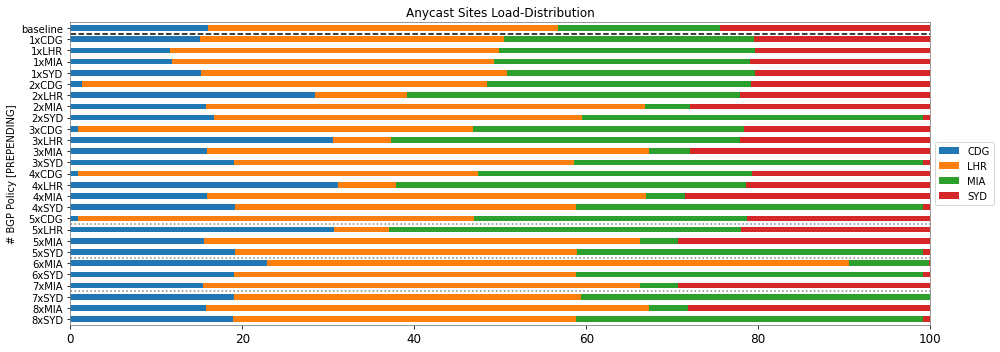

In [13]:
data = df_all.groupby(['site','bgp'])['percent'].sum().unstack().T.fillna(0)
data = pd.concat([data.tail(1),data.head(26)])
data = data.iloc[::-1]
print (data)
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot2grid((1,1), (0,0))
data.plot(ax=ax,
        kind='barh', 
        stacked=True,
#           alpha=.8,
         );
ax.xaxis.label.set_color('black')
ax.set_ylabel('# BGP Policy [PREPENDING]');
ax.tick_params(colors='black')
ax.xaxis.set_tick_params(labelsize=12)
ax.set_title('Anycast Sites Load-Distribution')
plt.gca().legend().set_title('')
ax.set_facecolor("#ffffff")

ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
ax.set_xlim(xmax=100) 

# plot dashed line on the top
ax.axhline(y=25.5, xmin=-1, xmax=1.0, color='black',linestyle='--')
ax.axhline(y=8.5, xmin=-1, xmax=1.0, color='grey',linestyle='dotted')
ax.axhline(y=5.5, xmin=-1, xmax=1.0, color='grey',linestyle='dotted')
ax.axhline(y=2.5, xmin=-1, xmax=1.0, color='grey',linestyle='dotted')

fig.tight_layout();
xlabels = ax.get_xticklabels()

ax.set_xticklabels(xlabels, rotation=0);
plt.show()


title = "<h2 style=\"color:#000\">Evaluating changes in: {} </h2>".format(bgp.upper())
display(HTML("take-away: Prepending does impact in the load distribution"))



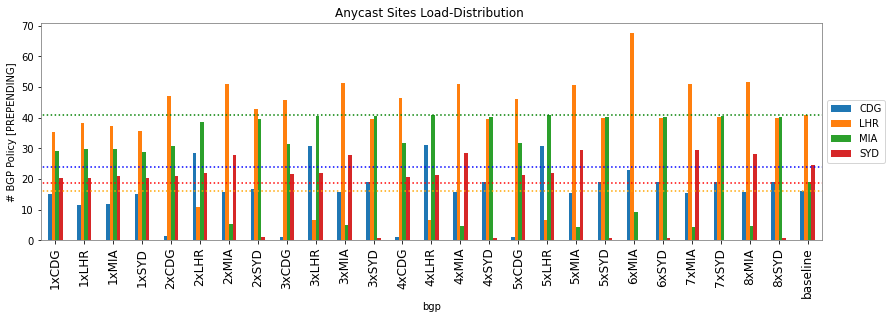

In [14]:
data = df_all.groupby(['site', 'bgp'])['percent'].sum().unstack().T

fig = plt.figure(figsize=(14, 4))
ax = plt.subplot2grid((1,1), (0,0))
data.plot(ax=ax,
    kind='bar', 
    stacked=False
     );
ax.xaxis.label.set_color('black')
ax.set_ylabel('# BGP Policy [PREPENDING]');
ax.tick_params(colors='black')
ax.xaxis.set_tick_params(labelsize=12)
title = 'Anycast Sites Load-Distribution '
ax.set_title(title)
plt.gca().legend().set_title('')
ax.set_facecolor("#ffffff")
xlabels = data.index.get_level_values(0).tolist()
ax.set_xticklabels(xlabels, rotation=90);
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.axhline(y=18.5, xmin=-1, xmax=1.0, color='red',linestyle='dotted')
ax.axhline(y=41.0, xmin=-1, xmax=1.0, color='green',linestyle='dotted')
ax.axhline(y=16.0, xmin=-1, xmax=1.0, color='orange',linestyle='dotted')
ax.axhline(y=24.0, xmin=-1, xmax=1.0, color='blue',linestyle='dotted')


plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
# ax.set_xlim(xmax=100) 

# Sites Overview

In [15]:
def plot_site(df,site):
#     print (data.head())
    data = df.groupby(['site','bgp'])['percent'].sum().unstack().T.fillna(0)
    data.sort_index(inplace=True,ascending=False)

    fig = plt.figure(figsize=(10, 4))
    ax = plt.subplot2grid((1,1), (0,0))
    data.plot(ax=ax,
        kind='barh', 
        stacked=True
         );
    ax.xaxis.label.set_color('black')
    ax.set_ylabel('# BGP Policy [PREPENDING]');
    ax.tick_params(colors='black')
    ax.xaxis.set_tick_params(labelsize=12)
    title = 'Anycast Sites Load-Distribution - Site {}'.format(site)
    ax.set_title(title)
    plt.gca().legend().set_title('')
    ax.set_facecolor("#ffffff")

    ax.spines['bottom'].set_color('0.5')
    ax.spines['top'].set_color('0.5')
    ax.spines['right'].set_color('0.5')
    ax.spines['left'].set_color('0.5')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
    ax.set_xlim(xmax=100) 

{'MIA', 'SYD', 'LHR', 'CDG'}


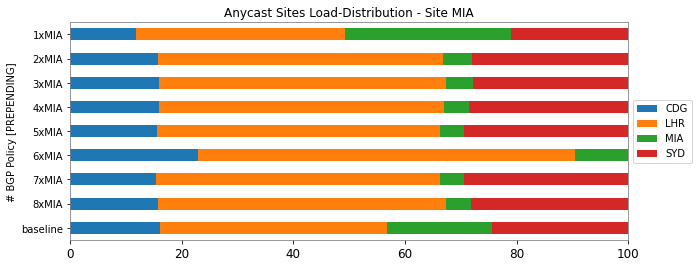

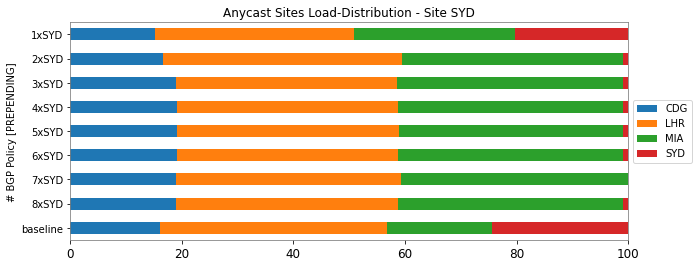

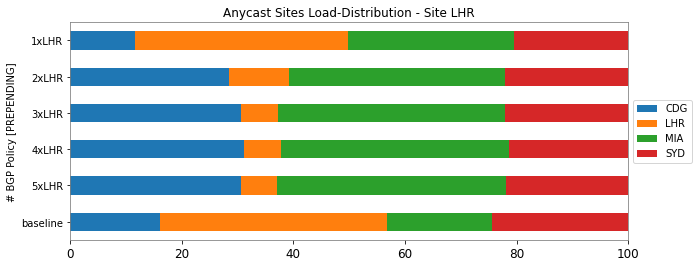

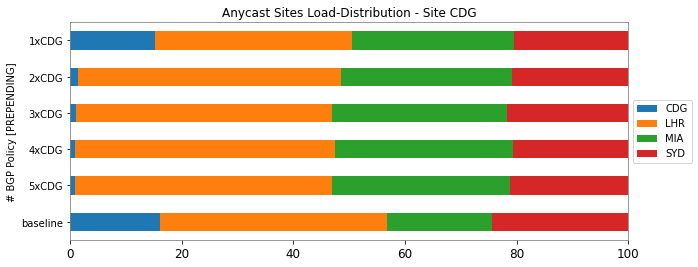

In [16]:
sites = []
for bgp in df_all['bgp'].unique():
    if (bgp=="baseline"):
        continue
    
    policy_site = bgp.split("x")[1]
    sites.append(policy_site)
print (set(sites))
sites=set(sites)
for bgp in sites:
    title = "<h2 style=\"color:#069\" >Evaluating changes in: {} </h2>".format(bgp.upper())
    display(HTML(title))
    data = df_all[df_all['bgp'].str.contains(bgp)]
    data = data.sort_values(by="bgp")
    data = data.append(df_all[df_all['bgp'].str.contains("baseline")])
    plot_site(data,bgp)
    plt.show()

In [17]:
def plot_site_bar(data, label,figure_name):

    fig = plt.figure(figsize=(10, 4))
    ax = plt.subplot2grid((1,1), (0,0))

    ax.xaxis.label.set_color('black')
    ax.set_ylabel('# Percent');
    ax.tick_params(colors='black')
    ax.xaxis.set_tick_params(labelsize=12)
    data= data.reindex(['LHR','SYD', 'MIA', 'CDG'])
    data['percent'].plot(ax=ax,kind='bar')
    ax.set_ylim(ymax=100);
    
    title = ' BGP Policy: {}'.format(label.upper())
    ax.set_title(title)
    xlabels = data.index.get_level_values(0).tolist()
    ax.set_xticklabels(xlabels, rotation=0);
    fig.savefig("./imgs/"+figure_name+".png", bbox_inches='tight', dpi=1200)
    ax.set_facecolor("#ffffff")
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()]) 
    ax.set_ylabel('Percentage (%)')
    

# bar chart for each site

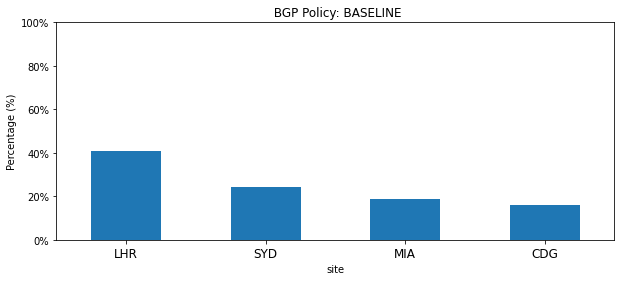

info for 1xMIA


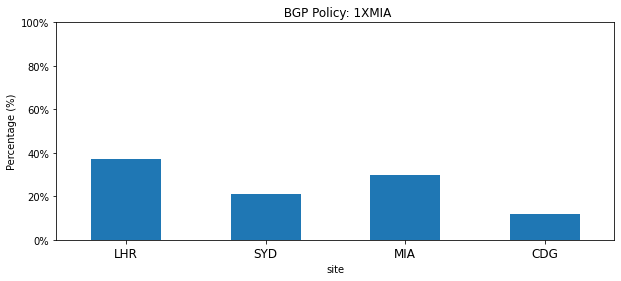

info for 2xMIA


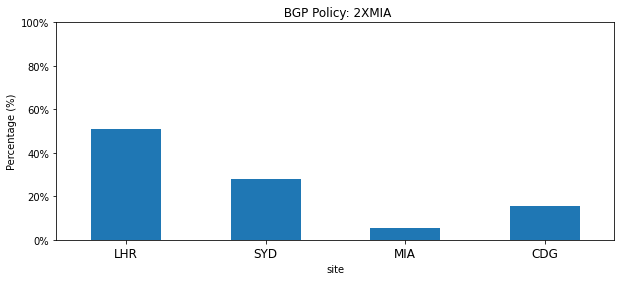

info for 3xMIA


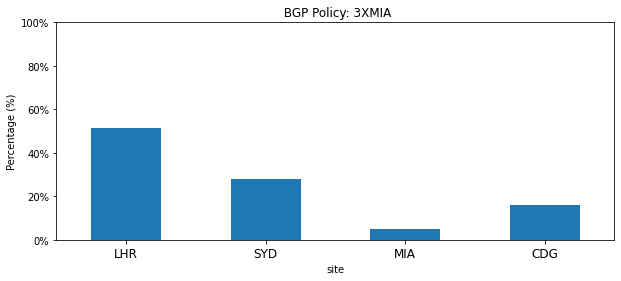

info for 4xMIA


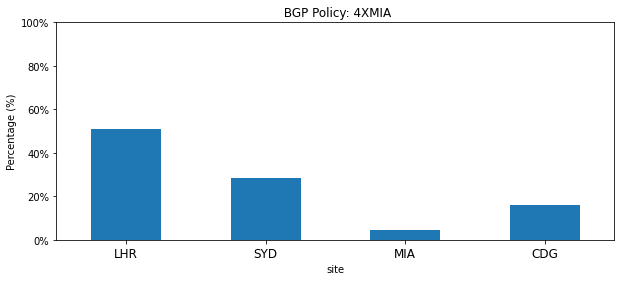

info for 5xMIA


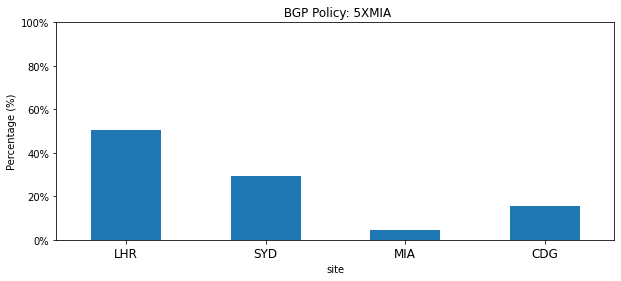

info for 6xMIA


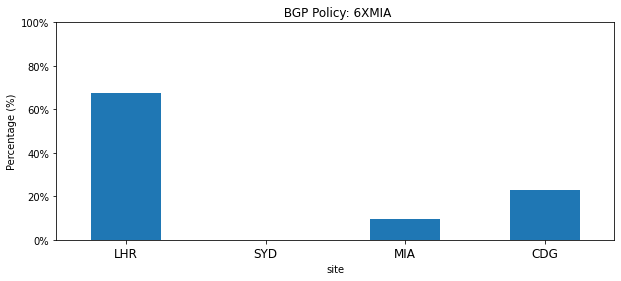

info for 7xMIA


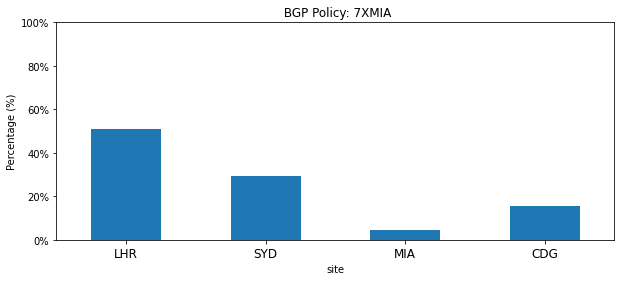

info for 8xMIA


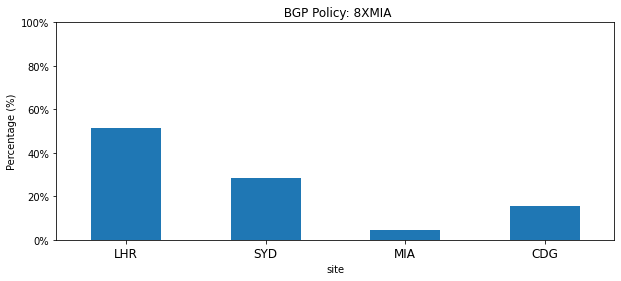

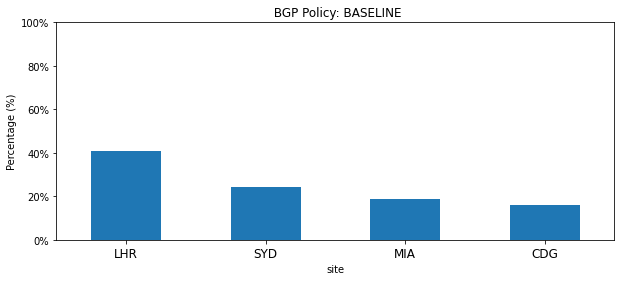

info for 1xSYD


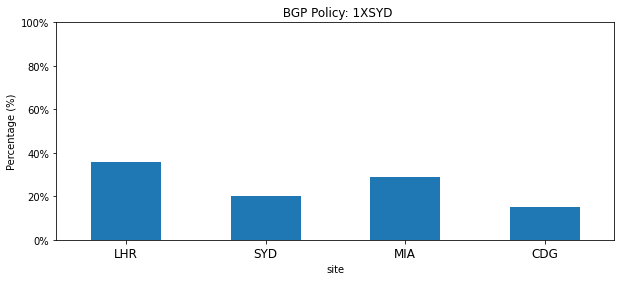

info for 2xSYD


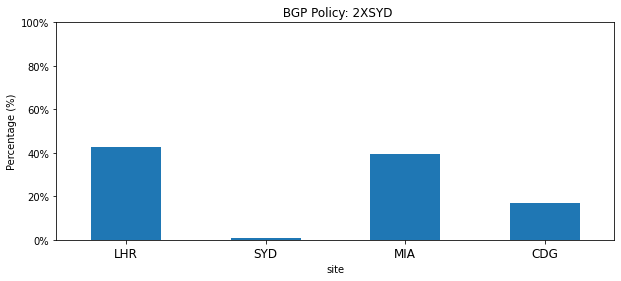

info for 3xSYD


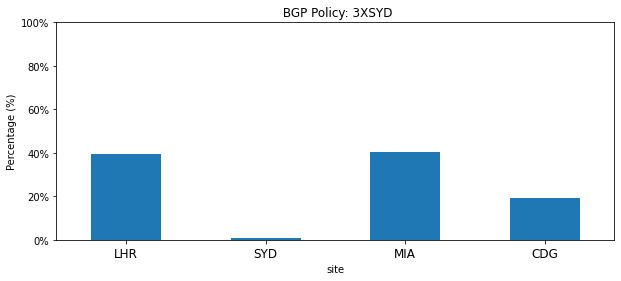

info for 4xSYD


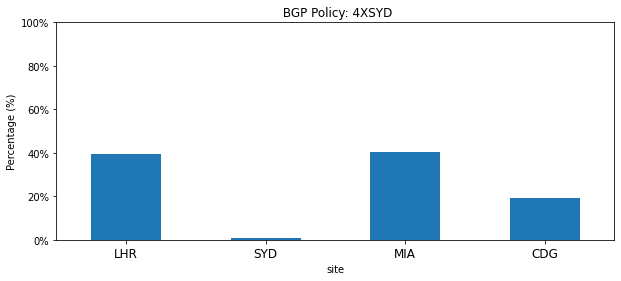

info for 5xSYD


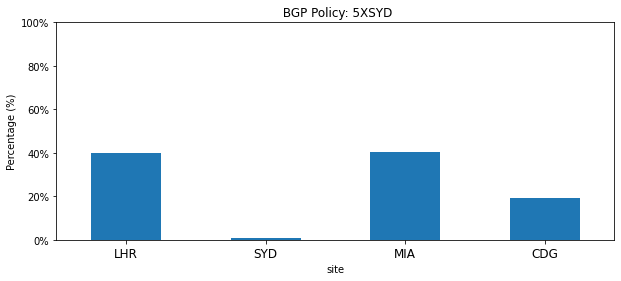

info for 6xSYD


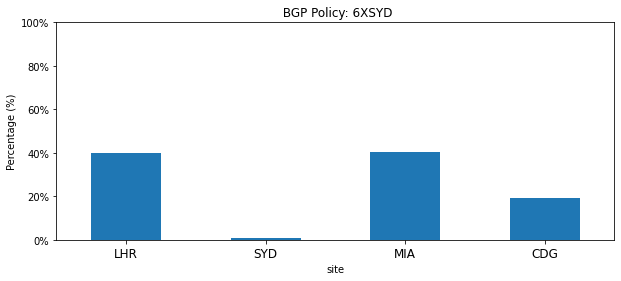

info for 7xSYD


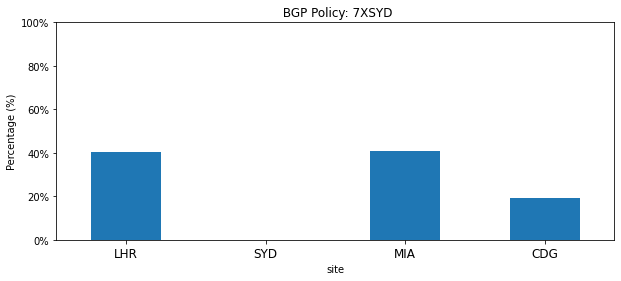

info for 8xSYD


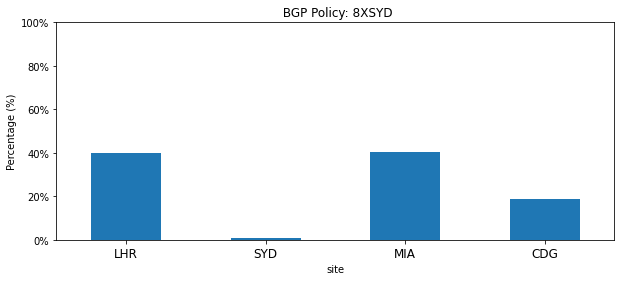

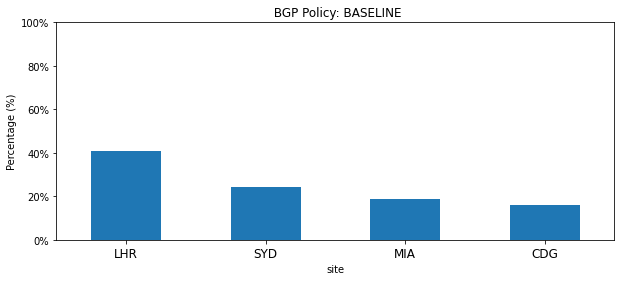

info for 1xLHR


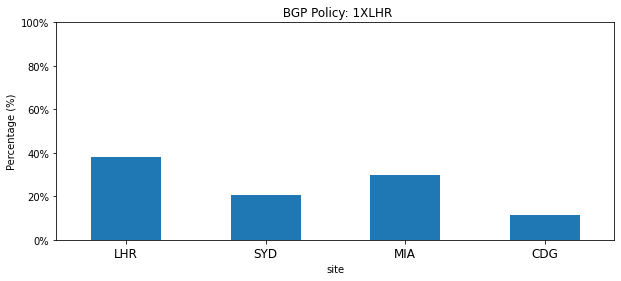

info for 2xLHR


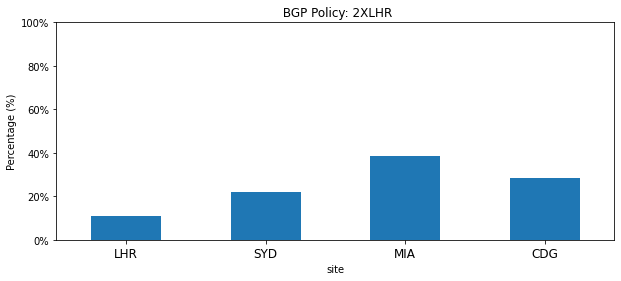

info for 3xLHR


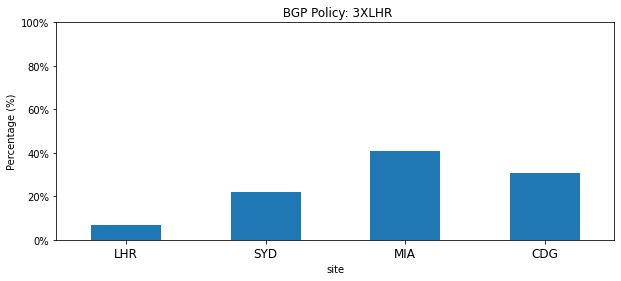

info for 4xLHR


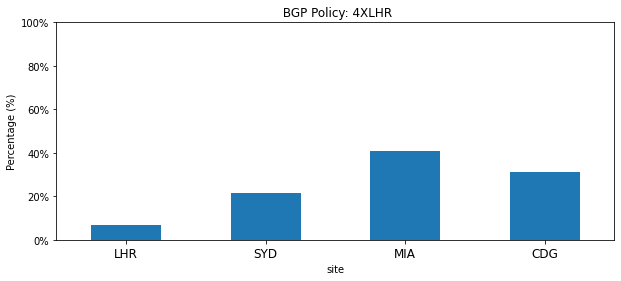

info for 5xLHR


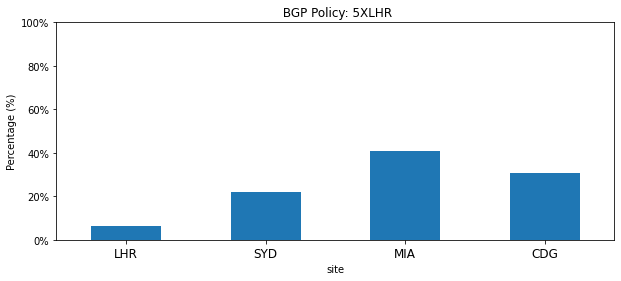

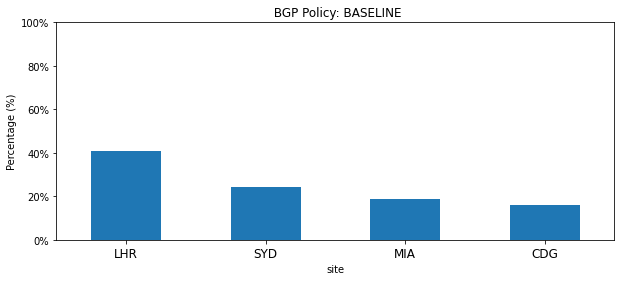

info for 1xCDG


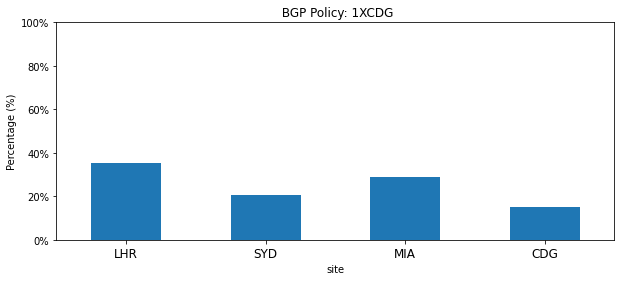

info for 2xCDG


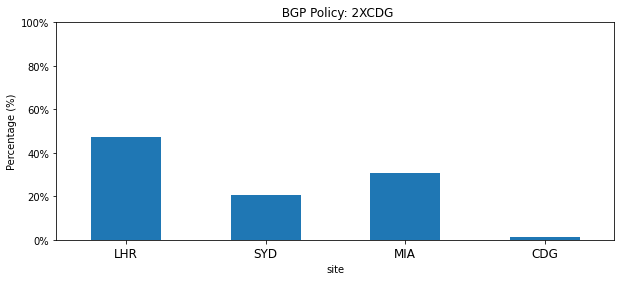

info for 3xCDG


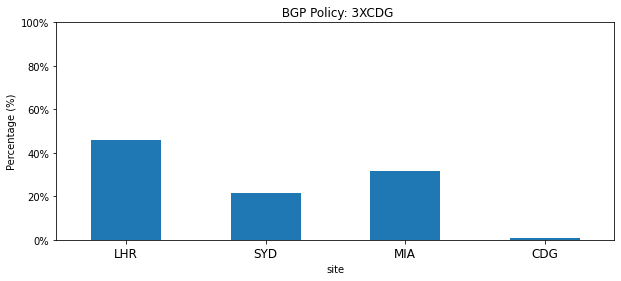

info for 4xCDG


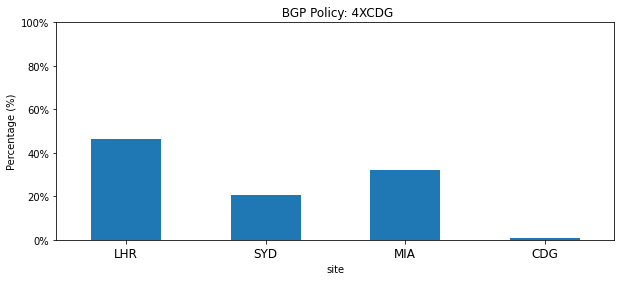

info for 5xCDG


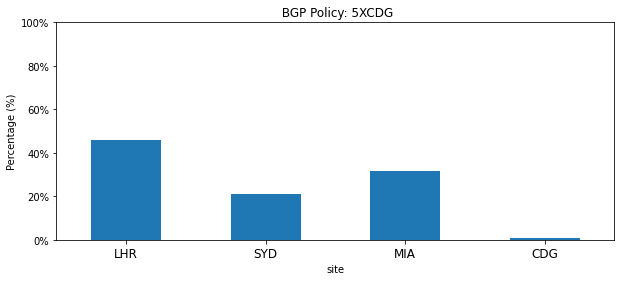

In [18]:
for site in sites:
    
    title = "<h2 style=\"color:#069\" >Evaluating changes in: {} </h2>".format(site.upper())
    display(HTML(title))
    # plot baseline
    data = df_all[df_all['bgp'].str.contains("baseline")].set_index('site')
    label = data.loc[:,"bgp"][1]
    plot_site_bar(data,label,label+site)
    plt.show()
    
    for  policy in sorted(df_all[df_all['bgp'].str.contains(site)]['bgp'].unique().tolist()):

         print ("info for {}".format(policy))
        
         data = df_all[df_all['bgp'].str.contains(policy)].set_index('site')
         label = data.loc[:,"bgp"][1]
         plot_site_bar(data,label,policy)
                
         plt.show()
    display(HTML("<hr>"))


In [19]:
!cd imgs;convert -delay 15 -loop 0 baselineMIA.png 1xMIA.png 2xMIA.png 3xMIA.png MIA.gif; cd -

In [20]:
!cd imgs;convert -delay 15 -loop 0  1xLHR.png 2xLHR.png 3xLHR.png 4xLHR.png 5xLHR.png LHR.gif; cd -

In [21]:
!cd imgs;convert -delay 10 -loop 0 baselineLHR.png 1xLHR.png 2xLHR.png 3xLHR.png LHR.gif; cd -

<hr>
<h1> Deviance from regular catchment distribution </h1>
<hr>

In [22]:
data = df_all.groupby(['site', 'bgp'])['percent'].sum()
data = data.unstack()
data

bgp       1xCDG      1xLHR      1xMIA      1xSYD      2xCDG      2xLHR  \
site                                                                     
CDG   15.134466  11.633354  11.876827  15.223294   1.351641  28.425936   
LHR   35.362819  38.214693  37.347174  35.584709  47.157127  10.757663   
MIA   29.056265  29.722089  29.805837  28.861544  30.661614  38.734448   
SYD   20.446450  20.429864  20.970162  20.330453  20.829617  22.081954   

bgp       2xMIA      2xSYD      3xCDG      3xLHR  ...      5xLHR      5xMIA  \
site                                              ...                         
CDG   15.739520  16.703217   0.954965  30.596510  ...  30.620919  15.554419   
LHR   51.060162  42.822622  45.899035   6.692802  ...   6.455032  50.667415   
MIA    5.289529  39.588456  31.463182  40.626671  ...  40.958104   4.405729   
SYD   27.910789   0.885705  21.682818  22.084017  ...  21.965945  29.372437   

bgp       5xSYD      6xMIA      6xSYD      7xMIA      7xSYD      8xMIA  \
site                                                                     
CDG   19.146237  22.936476  19.056455  15.413579  19.045800  15.763884   
LHR   39.763275  67.596004  39.754160  50.839219  40.304784  51.548388   
MIA   40.236913   9.352519  40.340791   4.399846  40.649169   4.486833   
SYD    0.853575   0.115002   0.848593  29.347356   0.000247  28.200896   

bgp       8xSYD   baseline  
site                        
CDG   18.933523  16.038719  
LHR   39.858762  40.702258  
MIA   40.358402  18.868887  
SYD    0.849313  24.390136  

[4 rows x 27 columns]

In [23]:
# data.index.get_level_values(2)
# df_all# type(data)

df2 = pd.DataFrame()
for index in data.index.tolist():
    data.loc[index,:]
    df = data.loc[index,:].reset_index()
    # get value reference
    reference_value = df[df.bgp=="baseline"].iloc[0,1]
    
    # new column  
    column = "diff_"+index
    df[column] =   reference_value - df[index] 
    df=df[~df.bgp.str.contains('baseline')]
    df.drop(index, axis=1,inplace=True)
    df2 = pd.concat([df, df2],sort=False)
df_diff = df2.groupby('bgp').sum().reset_index().set_index('bgp')

In [24]:
df_diff

diff_SYD   diff_MIA   diff_LHR   diff_CDG
bgp                                              
1xCDG   3.943686 -10.187378   5.339439   0.904253
1xLHR   3.960272 -10.853202   2.487565   4.405365
1xMIA   3.419974 -10.936950   3.355084   4.161893
1xSYD   4.059683  -9.992657   5.117550   0.815425
2xCDG   3.560518 -11.792727  -6.454869  14.687078
2xLHR   2.308182 -19.865561  29.944596 -12.387216
2xMIA  -3.520654  13.579357 -10.357903   0.299200
2xSYD  23.504430 -20.719569  -2.120364  -0.664498
3xCDG   2.707318 -12.594295  -5.196777  15.083754
3xLHR   2.306118 -21.757784  34.009456 -14.557790
3xMIA  -3.507292  14.054716 -10.705340   0.157916
3xSYD  23.523783 -21.677227   1.118207  -2.964762
4xCDG   3.692223 -13.003860  -5.778048  15.089686
4xLHR   2.959916 -21.864230  34.002986 -15.098671
4xMIA  -4.129988  14.394783 -10.421199   0.156404
4xSYD  23.537115 -21.489942   1.060508  -3.107681
5xCDG   3.118414 -12.867315  -5.345263  15.094164
5xLHR   2.424190 -22.089217  34.247226 -14.582199
5xMIA  -4.982301  14.463157  -9.965157   0.484301
5xSYD  23.536560 -21.368026   0.938983  -3.107518
6xMIA  24.275134   9.516368 -26.893745  -6.897756
6xSYD  23.541542 -21.471904   0.948098  -3.017736
7xMIA  -4.957220  14.469041 -10.136961   0.625140
7xSYD  24.389888 -21.780282   0.397475  -3.007081
8xMIA  -3.810760  14.382054 -10.846129   0.274835
8xSYD  23.540823 -21.489515   0.843496  -2.894804

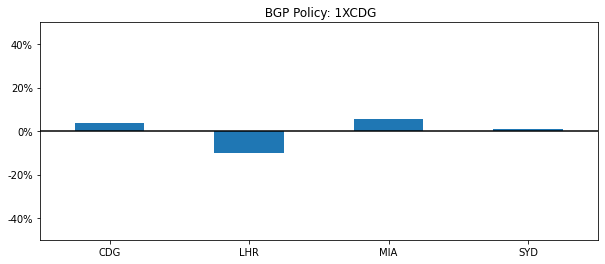

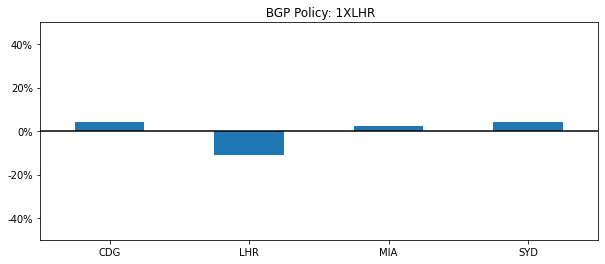

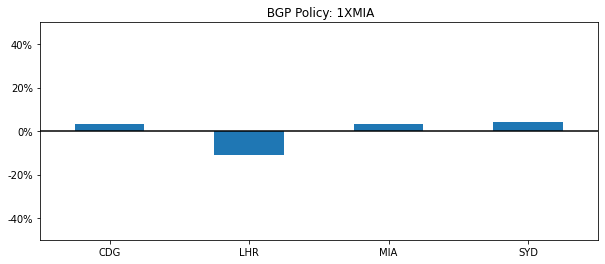

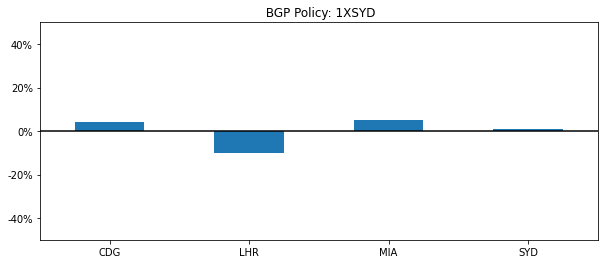

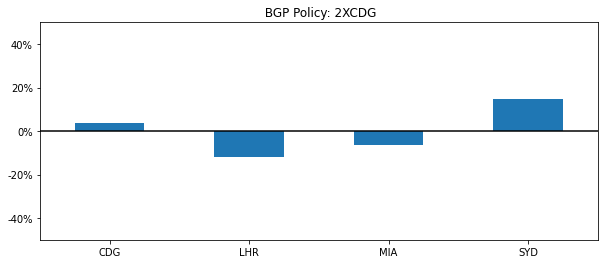

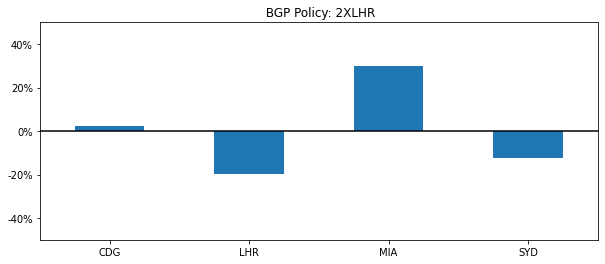

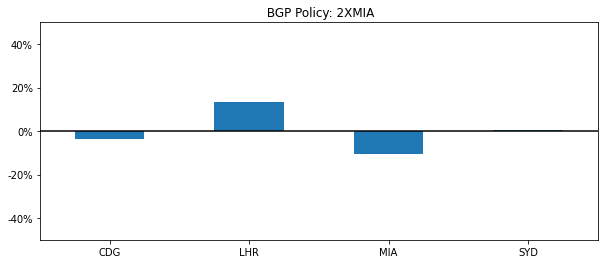

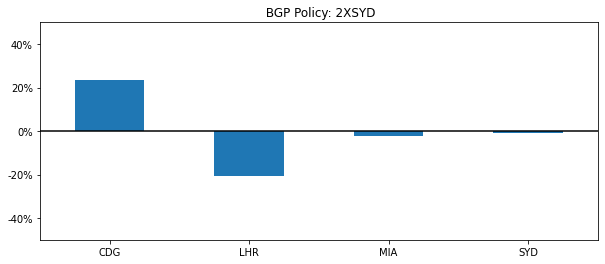

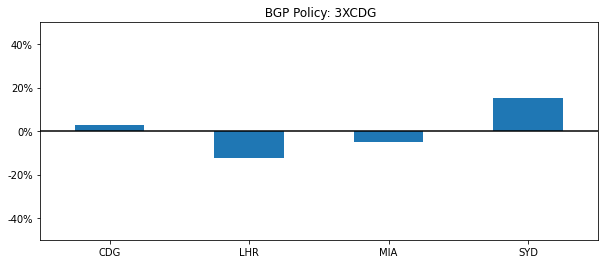

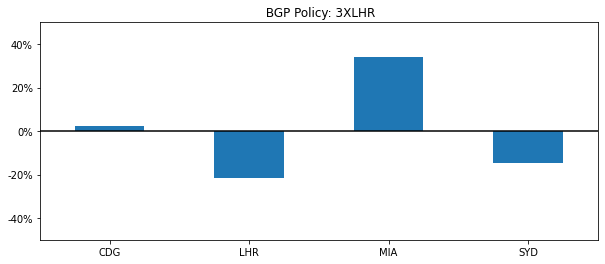

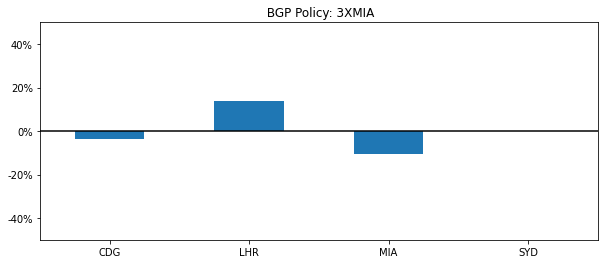

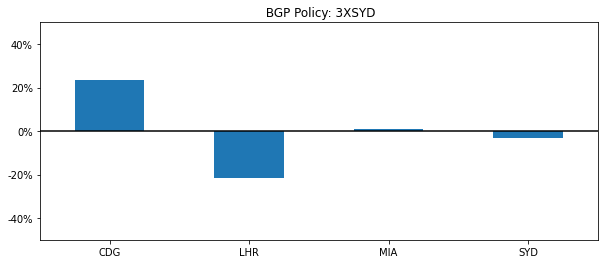

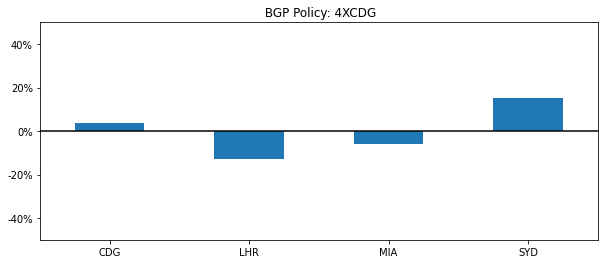

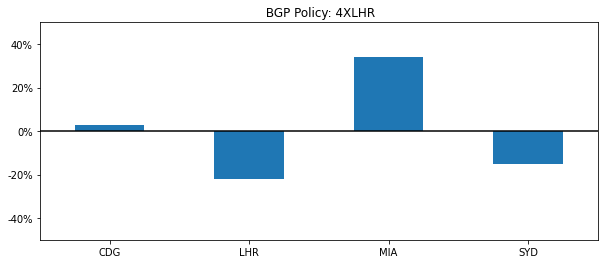

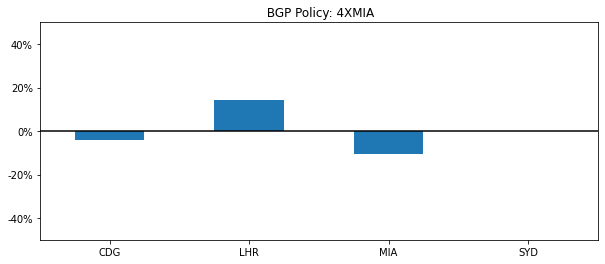

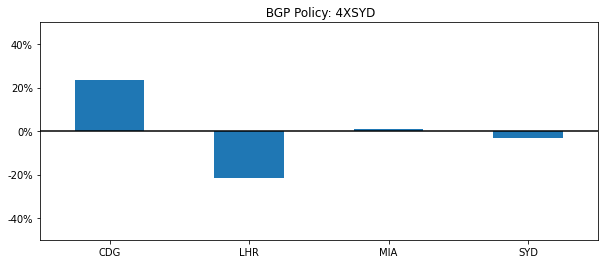

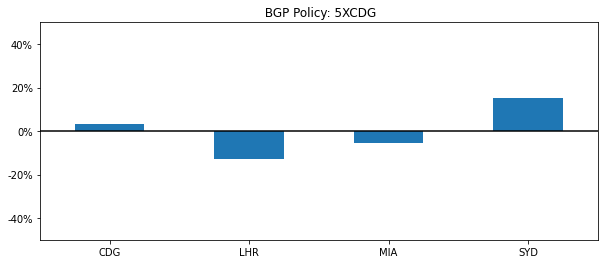

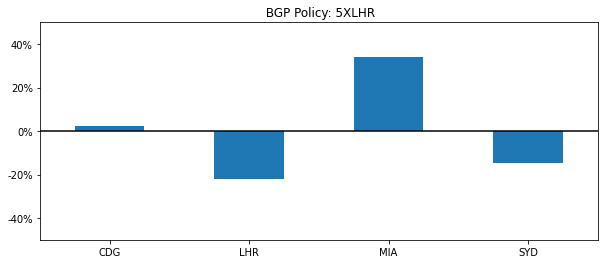

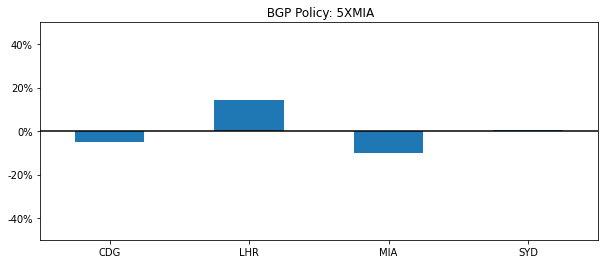

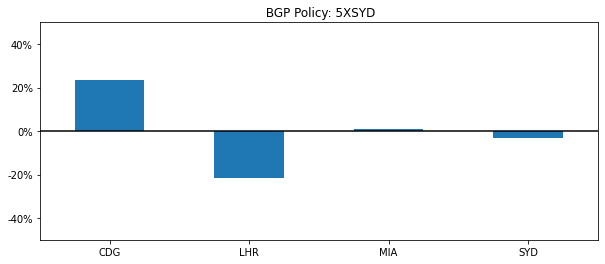

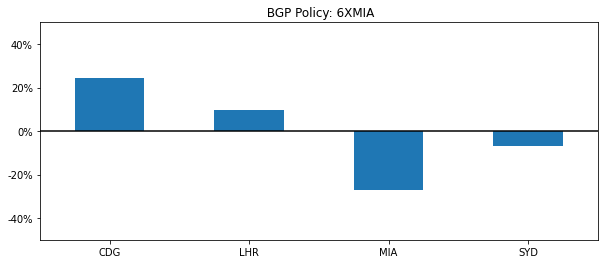

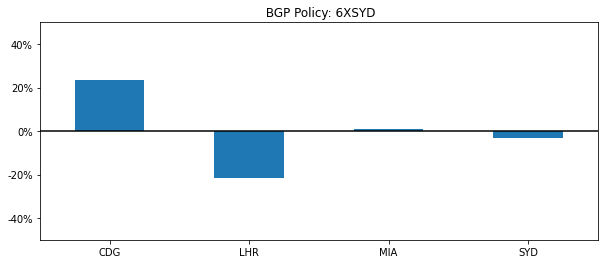

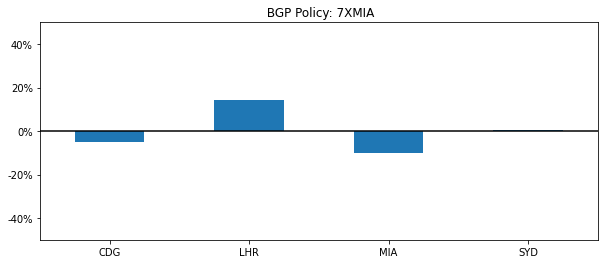

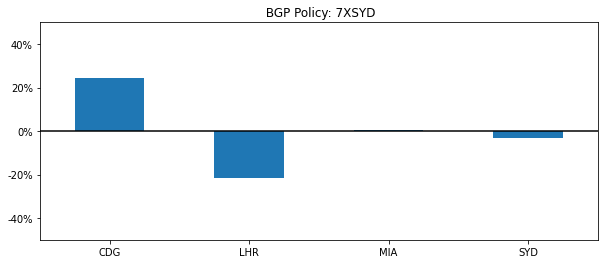

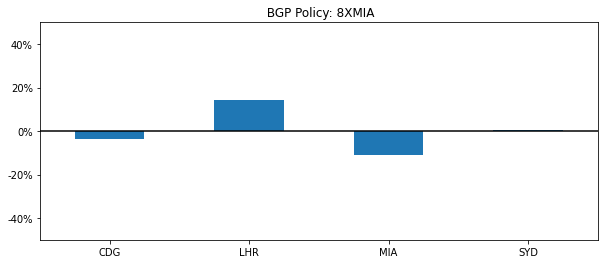

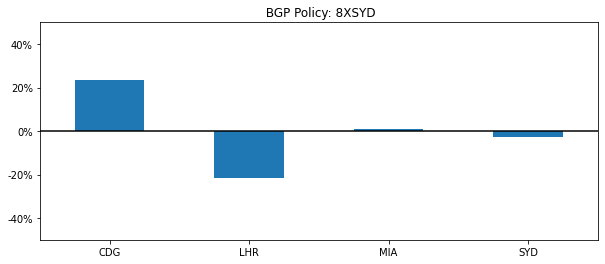

In [25]:
for index in df_diff.index.tolist():
    fig = plt.figure(figsize=(10, 4))
    ax = plt.subplot2grid((1,1), (0,0))
    ax.axhline(y=0, xmin=-1, xmax=1.0, color='black')

    g=df_diff.loc[index,:].plot(kind="bar",ax=ax)
    title = ' BGP Policy: {}'.format(index.upper())
    ax.set_title(title)
    
    xlabels = data.index.get_level_values(0).tolist()
    ax.set_xticklabels(xlabels, rotation=0);
    ax.set_ylim(ymin=-50, ymax=50);

    plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()]) 

    xlabels = data.index.get_level_values(0).tolist()
    ax.set_xticklabels(xlabels, rotation=0);
    figure_name = index+"_diff"
#     fig.savefig("./imgs/"+figure_name+".png", bbox_inches='tight', dpi=1200)

#     plt.show()

---
---
<h1 align="center"> Catchment SIDE EFFECT </h1>

---
---

In [26]:
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly 

from plotly import exceptions
import plotly.figure_factory as ff
 

# py.offline.init_notebook_mode(connected=True)
# py.tools.set_config_file(world_readable=False, sharing='private')

In [27]:
# bgp_list = ['1xCDG','2xCDG','3xCDG','4xCDG','5xCDG', '1xLHR','2xLHR','3xLHR','4xLHR','5xLHR','1xMIA','2xSYD',
#  '3xMIA','4xMIA','5xMIA','6xMIA','7xMIA','8xMIA', '1xSYD','2xSYD','3xSYD','4xSYD','5xSYD','6xSYD',
#  '7xSYD','8xSYD', 'baseline']
# bgp_list


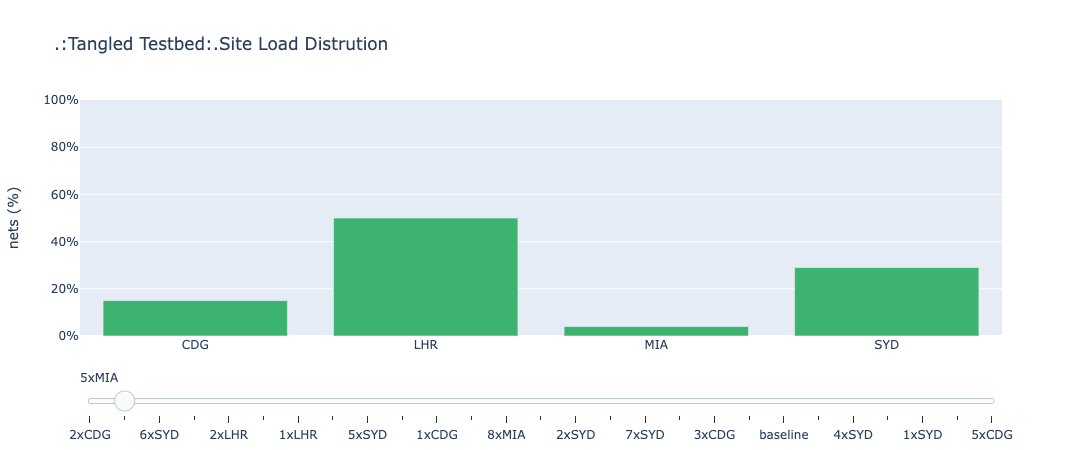

In [28]:
df = df_all
layout = go.Layout(
    barmode='overlay',
    title='.:Tangled Testbed:.Site Load Distrution',
    showlegend=True, 
    xaxis = dict(
        tickangle=0
    ),
        
    # y axis
    yaxis = dict(
     fixedrange = True,
     range = [0,100],
     title = "nets (%)",
     ticksuffix = "%",
    ),   
)

data_slider = []
# bgp_list = ['baseline',]
# bgp_list = df['bgp'].unique().tolist()
# bgp_list.sort()

# bgp_list = ['baseline', '1xSYD', '2xSYD', '3xSYD', '1xCDG', '2xCDG', '3xCDG', '1xLHR', '2xLHR', '3xLHR', '1xMIA', '2xMIA', '3xMIA']
# for bgp in df['bgp'].unique():    
# bgp_list=bgp_list.reverse()
bgp_list = ['1xCDG','2xCDG','3xCDG','4xCDG','5xCDG', '1xLHR','2xLHR','3xLHR','4xLHR','5xLHR','1xMIA','2xSYD',
 '3xMIA','4xMIA','5xMIA','6xMIA','7xMIA','8xMIA', '1xSYD','2xSYD','3xSYD','4xSYD','5xSYD','6xSYD',
 '7xSYD','8xSYD', 'baseline']
# for bgp in bgp_list:
for bgp in df['bgp'].unique():    

#     print (bgp)
    df_bgp_policy = df[(df['bgp']== bgp)]    
    df_bgp_policy.sort_values(by=['site'],inplace=True)
    # array of graphics - for each BGP policy
    data_each_policy = dict(
                        type='bar',
                        visible=False,
                        x=df_bgp_policy['site'],
                        y=df_bgp_policy['percent'].astype(int),
                        showlegend=False,
                        hovertext="",
                        marker=dict(color="mediumseagreen"),
                        hoverinfo = "y",
                        customdata = (bgp,),
                        )
    
              
    
    
    # array of graphs
    data_slider.append(data_each_policy)

data_slider[1]['visible']=True
steps = []


for i in range(len(data_slider)):
    label = data_slider[i]['customdata'][0]
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='{}'.format(label)
               )
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=1, pad={"t": 30}, steps=steps)]
layout[ 'sliders' ] = sliders
# layout[ 'annotations' ] = annot
fig = go.Figure()
fig = dict(data=data_slider, layout=layout)

plotly.offline.iplot(fig)



---
---
<h1 align="center"> SITE LOAD (/24)</h1>

---
---

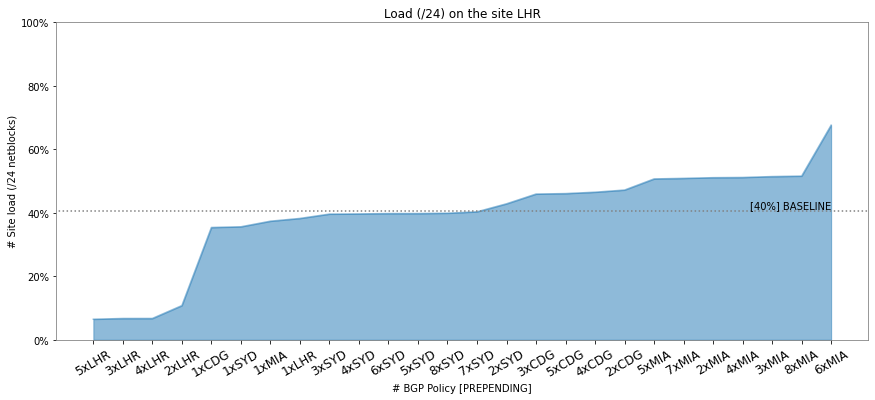

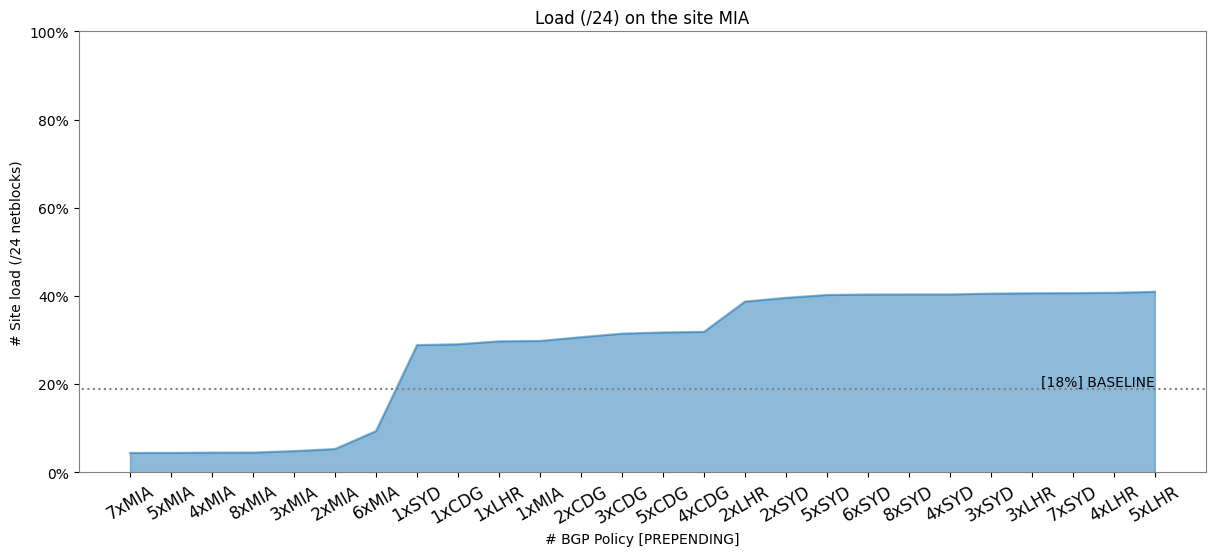

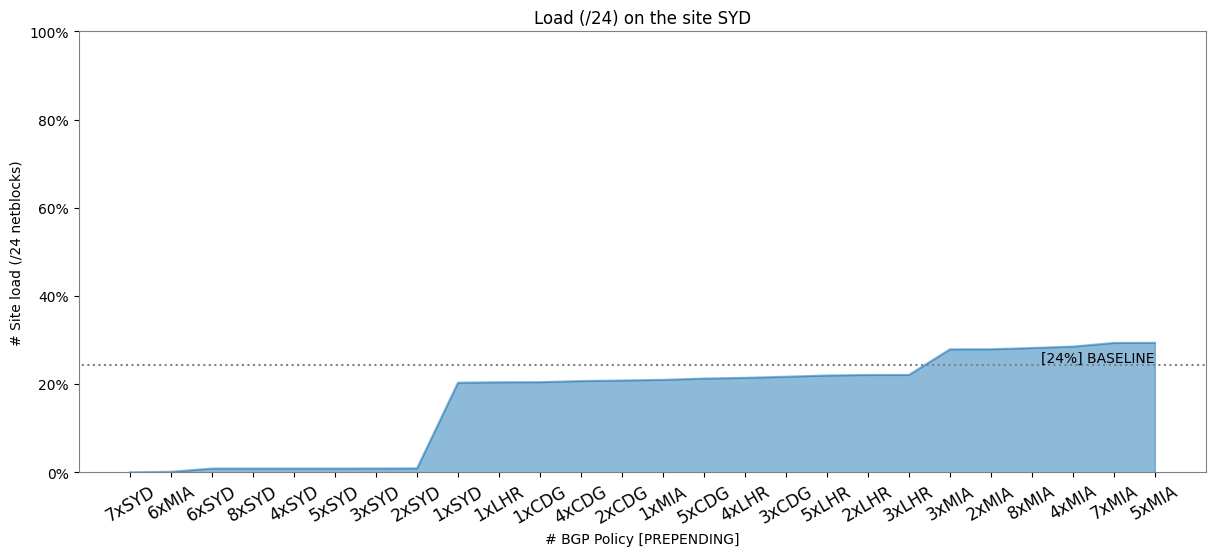

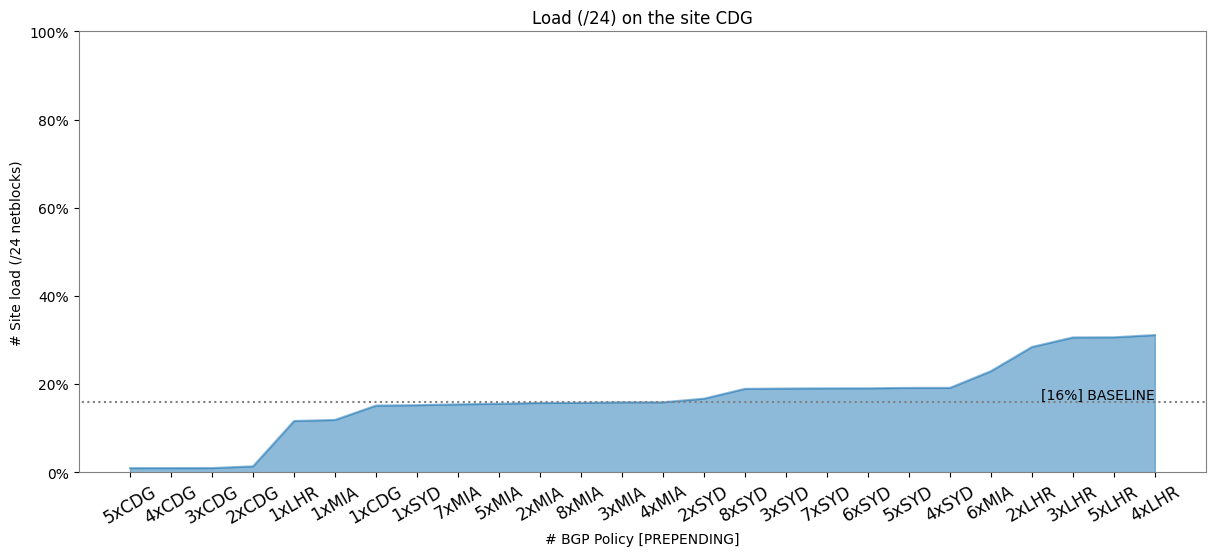

In [29]:
df = df_all

for site in df.site.unique():

    (fig,ax) = init_fig()
    title = "<h2 style=\"color:#069\" >SITE: {} </h2>".format(site.upper())
    display(HTML(title))
    
    df_site = df[df['site']==site].sort_values(by="bgp")
    df_site=df_site[~df_site.bgp.str.contains('baseline')]
    data = df_site[["percent","bgp"]] 
    data.set_index('bgp',inplace=True)
    data = data.sort_values('percent')
    
    data.plot(ax=ax, kind='area',stacked=False);

    
    title = 'Load (/24) on the site {}'.format(site.upper())
    ax.set_title(title);
    ax.set_ylim(ymax=100, ymin=0);
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()]) 
    ax.get_legend().remove()
    

    # REFERENCE LINE
    get_and_plot_reference_value(df,site)
    
    # xlabel
    ax.set_xlabel('# BGP Policy [PREPENDING]');
    ax.set_ylabel('# Site load (/24 netblocks)');

    xlabels = data.index.get_level_values(0).tolist()
    ax.xaxis.set_tick_params(labelsize=12)
    ax.xaxis.label.set_color('black')
    plt.xticks(np.arange(len(data)), xlabels, rotation=30)
    
    plt.show()

33.18966094456776


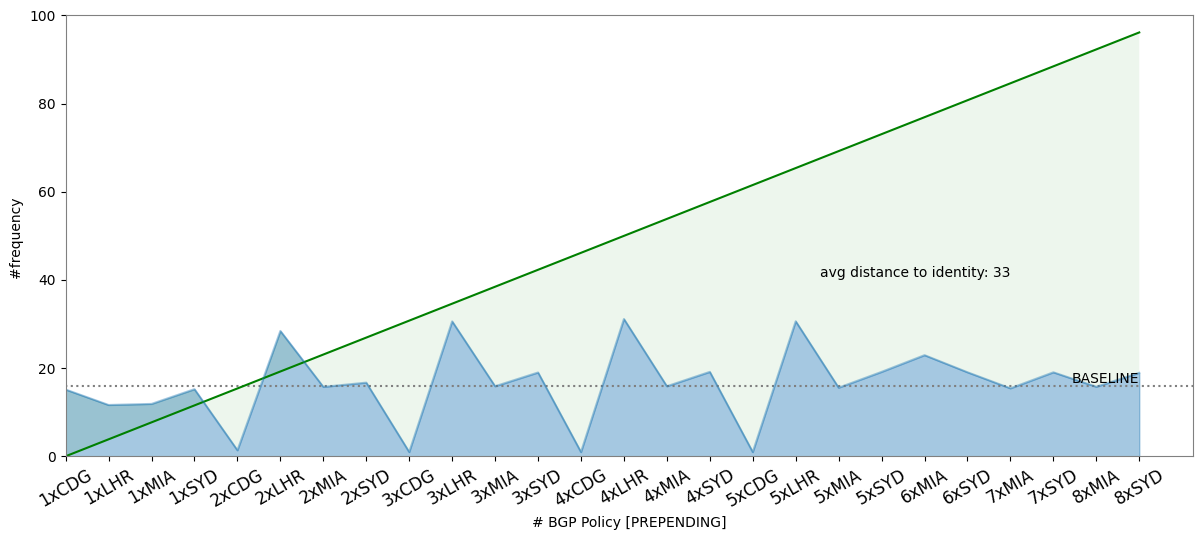

In [30]:
df = df_all

df_site = df[df['site']=="CDG"].sort_values(by="bgp")



(fig,ax) = init_fig()
title = "<h2 style=\"color:#069\" >SITE: {} </h2>".format(site.upper())
display(HTML(title))

df_site = df[df['site']==site].sort_values(by="bgp")
reference_value = df_site[df_site.bgp=="baseline"].iloc[0,2]
df_site=df_site[~df_site.bgp.str.contains('baseline')]
ax.axhline(y=reference_value, xmin=-1, xmax=1.0, color='grey', linestyle='dotted')
#     ax.axhline(y=8.5, color='grey',linestyle='dotted')

data = df_site[["percent","bgp"]] 

data.set_index('bgp',inplace=True)

# data = data.sort_values(by="percent")
data.reset_index().head()

# identify function
number_of_groups = 100/int(data.size)
identity = pynum_float.arange(0, 100,number_of_groups)
data['identity'] = identity
data['distance'] = (data['identity'] - data['percent']).clip(lower=0)
print (data['distance'].mean())

# (fig,ax) = init_fig()

# data['distance'].plot(ax=ax,
#           kind='bar',
#          )
data['identity'].plot(ax=ax,
          kind='line',
          color='green',
                      stacked=False,
                     )
data['percent'].plot(ax=ax,
          kind='area',
                    alpha=.4)
                    
# data['distance'].plot(ax=ax,
#           kind='bar',
#                       stacked=False)

# leg = ax.legend();
ax.set_ylim(ymax=100);
ax.set_xlim(xmin=0);
# xlabel
ax.set_xlabel('# BGP Policy [PREPENDING]');
ax.set_ylabel('# Site load (/24 netblocks)');

xlabels = data.index.get_level_values(0).tolist()
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.label.set_color('black')
plt.xticks(np.arange(len(data)), xlabels, rotation=30)
    
# ax.get_legend().remove()
ax.annotate("BASELINE",
             xy=(25, reference_value),
             ha='right',
             color='black',
             va='bottom')

msg = "avg distance to identity: {}".format(int(data['distance'].mean()))
ax.annotate(msg,
             xy=(22, 40),
             ha='right',
             color='black',
             va='bottom')

plt.fill_between(data.index, data.percent, data.identity, alpha=.07, facecolor='green')

# ax.axvline(x=1,  color='grey')
# ax.axvline(x=1, color='grey')


# -------
degrees_of_control = 10
bins = list (range(0,100,degrees_of_control))
data['binned'] = pd.cut(data['percent'], bins)

# xlabel
label = '#frequency '.format(degrees_of_control)
ax.set_ylabel(label);


# all xlabels
all_markers = data.index.to_list()

# xlabel where we detect a change in the behaviour
first = data.drop_duplicates('binned', keep="first") 
last = data.drop_duplicates('binned', keep="last") 
markers = pd.concat([first,last]).reset_index()['bgp'].to_list()
markers

for xlabel in  markers: 
#     print (xlabel)
    index = all_markers.index(xlabel)
#     print (index)
#     ax.axvline(x=index, color='grey',linewidth=0.21)
plt.show()
# ax.fill_betweenx(1,1, interpolate=True)



---
---
<h1 align="center"> John's graphic </h1>

---
---

In [31]:
df = df_all
df_all

site    count    percent    bgp
0   LHR  1696223  47.157127  2xCDG
1   MIA  1102886  30.661614  2xCDG
2   SYD   749233  20.829617  2xCDG
3   CDG    48618   1.351641  2xCDG
0   LHR  1843011  50.667415  5xMIA
..  ...      ...        ...    ...
3   SYD    30786   0.849313  8xSYD
0   LHR  1664244  46.047522  5xCDG
1   MIA  1147006  31.736202  5xCDG
2   SYD   768800  21.271721  5xCDG
3   CDG    34138   0.944555  5xCDG

[108 rows x 4 columns]

16.03871923591512


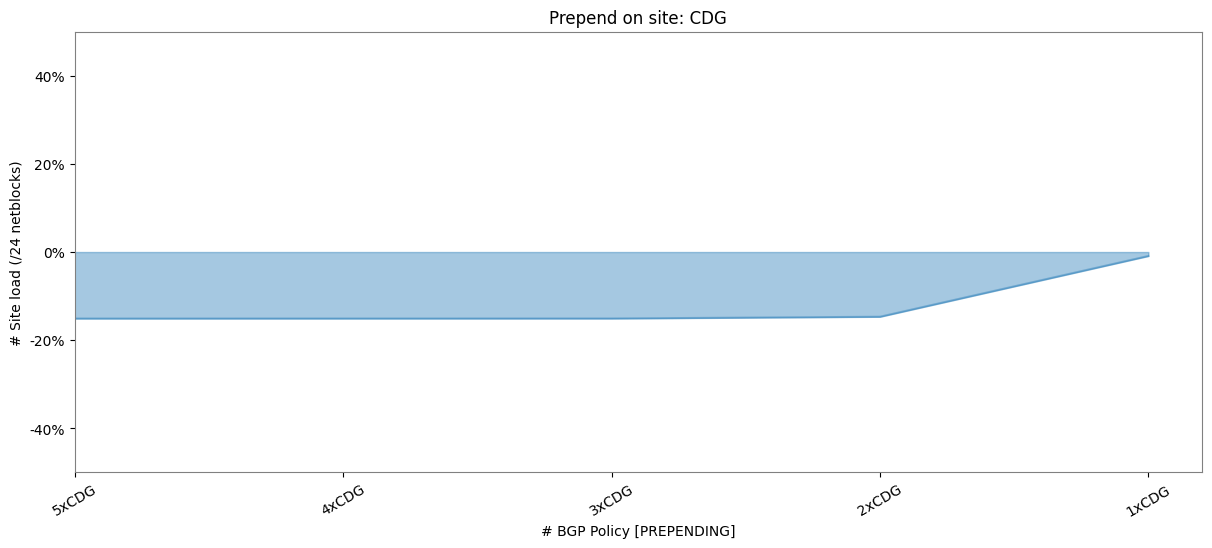

In [32]:
df = df_all
# prepend="MIA"
site = "CDG"
prepend=site

# select the node
df_site = df[df['site']==site].sort_values(by="bgp", ascending=True)

# select the site
# df_site = df_site[df_site.bgp.str.contains(prepend+"|MIA")]
df_site = df_site[df_site.bgp.str.contains(prepend)]

reference_value = df[(df.bgp=="baseline") & (df.site==site)].iloc[0,2]

data = df_site[["percent","bgp"]].sort_values(by="bgp", ascending=False)
data.set_index('bgp',inplace=True)
data.head()

data = pd.concat([data,data.head(1)]).drop_duplicates('percent', keep="last")
print (reference_value)
data['diff'] = data['percent'] - reference_value
data = data.sort_values(by="bgp", ascending=False)
# data= data.reindex(['8xMIA', '7xMIA', '6xMIA', '1xCDG', '5xMIA', '5xCDG', '4xMIA', '4xCDG', '3xMIA',
#        '3xCDG', '2xMIA', '2xCDG', '1xMIA'])
 
data.index.tolist()

(fig,ax) = init_fig()

# fig = plt.figure(figsize=(10, 2))
# fig,axes = plt.subplots(nrows=2, ncols=2)
# ax=axes[0,0]
# ax = plt.subplot2grid((1,1), (0,0))
# axes = plt.subplots(1, 2)
# fig, axes = plt.subplots(1, 2)

# data= data.reindex(['8xMIA',
#  '7xMIA',
#  '6xMIA',
#  '5xMIA',
#  '4xMIA',
#  '3xMIA',
#  '2xMIA',
#  '1xMIA',             
#  '5xCDG',            
#  '4xCDG',
#  '3xCDG',
#  '2xCDG',
#  '1xCDG',
# ])

data['diff'].plot(ax=ax,kind='area', stacked=False, alpha=.4)
ax.set_ylim(ymax=50,ymin=-50);
ax.set_xlim(xmin=0);
ax.set_xlabel('# BGP Policy [PREPENDING]');
ax.set_ylabel('# Site load (/24 netblocks)');
ax.set_title("Prepend on site: {}".format(site));
# Xticks
xlabels = data.index.get_level_values(0).tolist()
ax.xaxis.set_tick_params(labelsize=10)
# ax.set_ylim(ymax=100);
# ax.set_xlim(xmin=0);
plt.xticks(np.arange(len(data)), xlabels, rotation=30)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()]);




LHR
40.70225827288564
MIA
18.868886848158144
SYD
24.390135643041088
CDG
16.03871923591512


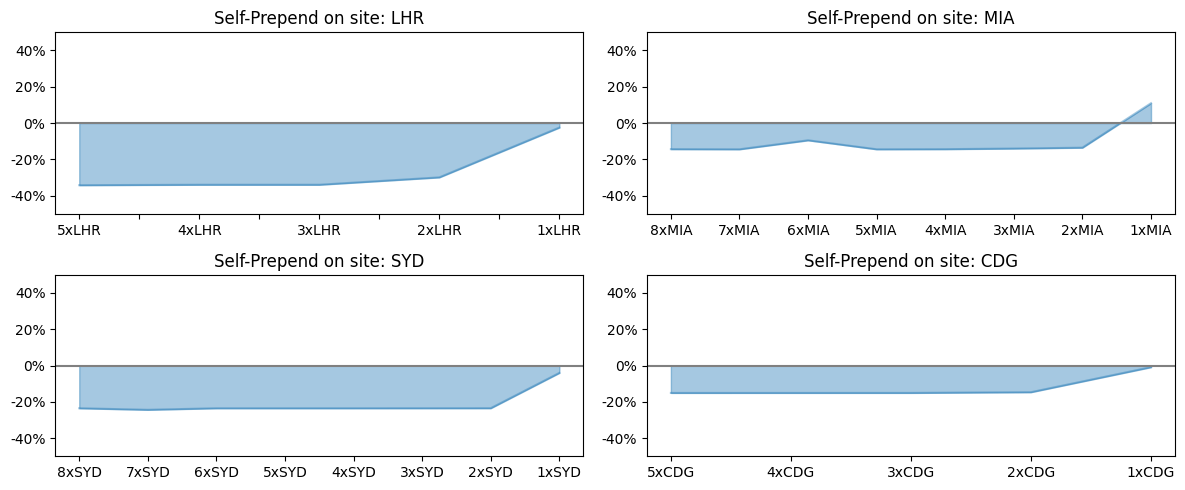

In [33]:
fig = plt.figure(constrained_layout=False, figsize=(12, 5))
grid4 = fig.add_gridspec(ncols=2, nrows=2)
ax1 = fig.add_subplot(grid4[0, 0])
ax2 = fig.add_subplot(grid4[0, 1])
ax3 = fig.add_subplot(grid4[1, 0])
ax4 = fig.add_subplot(grid4[1, 1])

df = df_all
count = 0
for site in df.site.unique()[0:4]:
    count+=1
    print (site)
    prepend = site

    # select the node
    df_site = df[df['site']==site].sort_values(by="bgp", ascending=True)
    # bgp policies
    df_site = df_site[df_site.bgp.str.contains(prepend)]

    reference_value = df[(df.bgp=="baseline") & (df.site==site)].iloc[0,2]
    data = df_site[["percent","bgp"]].sort_values(by="bgp", ascending=False)
    data.set_index('bgp',inplace=True)
    data = pd.concat([data,data.head(1)]).drop_duplicates('percent', keep="last")
    print (reference_value)
    data['diff'] = data['percent'] - reference_value
    data = data.sort_values(by="bgp", ascending=False)
    
    if (count == 1):
        data['diff'].plot(ax=ax1,kind='area', stacked=False, alpha=.4)
        ax1.set_ylim(ymax=50,ymin=-50);
#         ax.set_xlabel('# BGP Policy [PREPENDING]');
# ax.set_ylabel('# Site load (/24 netblocks)');
# ax.set_title("Prepend on site: {}".format(site));
# Xticks
        xlabels = data.index.get_level_values(0).tolist()
        ax1.xaxis.set_tick_params(labelsize=10)
        plt.xticks(np.arange(len(data)), xlabels, rotation=30)
        ax1.set_xlabel('');
        vals = ax1.get_yticks()
        ax1.set_yticklabels(['{:.0f}%'.format(x) for x in vals])
        ax1.axhline(y=0, xmin=-1, xmax=1.0, color='grey')
        ax1.set_title("Self-Prepend on site: {}".format(site));

        
    if (count == 2):
        data['diff'].plot(ax=ax2,kind='area', stacked=False, alpha=.4)
        ax2.set_ylim(ymax=50,ymin=-50);
        ax2.set_xlabel('');
        vals = ax2.get_yticks()
        ax2.set_yticklabels(['{:.0f}%'.format(x) for x in vals])
#         ax2.annotate("BASELINE",xy=(7, 0), ha='right',color='black',va='bottom')
        ax2.axhline(y=0, xmin=-1, xmax=1.0, color='grey')
        ax2.set_title("Self-Prepend on site: {}".format(site));

    if (count == 3):
        data['diff'].plot(ax=ax3,kind='area', stacked=False, alpha=.4)
        ax3.set_ylim(ymax=50,ymin=-50);
        ax3.set_xlabel('');
        vals = ax3.get_yticks()
        ax3.set_yticklabels(['{:.0f}%'.format(x) for x in vals])
        ax3.axhline(y=0, xmin=-1, xmax=1.0, color='grey')
        ax3.set_title("Self-Prepend on site: {}".format(site));

    if (count == 4):
        data['diff'].plot(ax=ax4,kind='area', stacked=False, alpha=.4)
        ax4.set_ylim(ymax=50,ymin=-50);
        ax4.set_xlabel('');
        vals = ax4.get_yticks()
        ax4.set_yticklabels(['{:.0f}%'.format(x) for x in vals])
        ax4.axhline(y=0, xmin=-1, xmax=1.0, color='grey')
        ax4.set_title("Self-Prepend on site: {}".format(site)); 
        
plt.tight_layout()
 


## Version 2

CDG


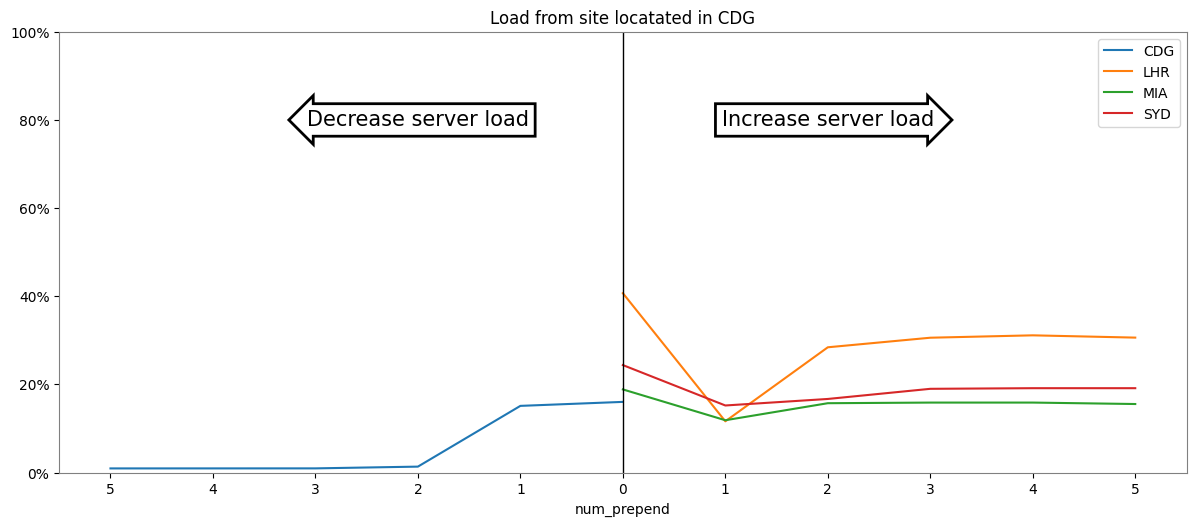

LHR


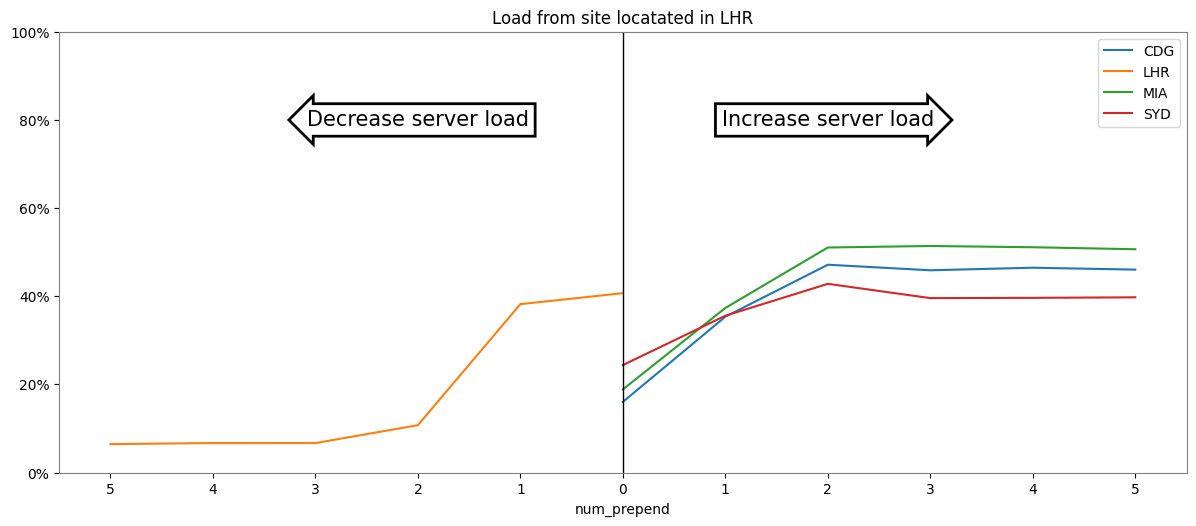

MIA


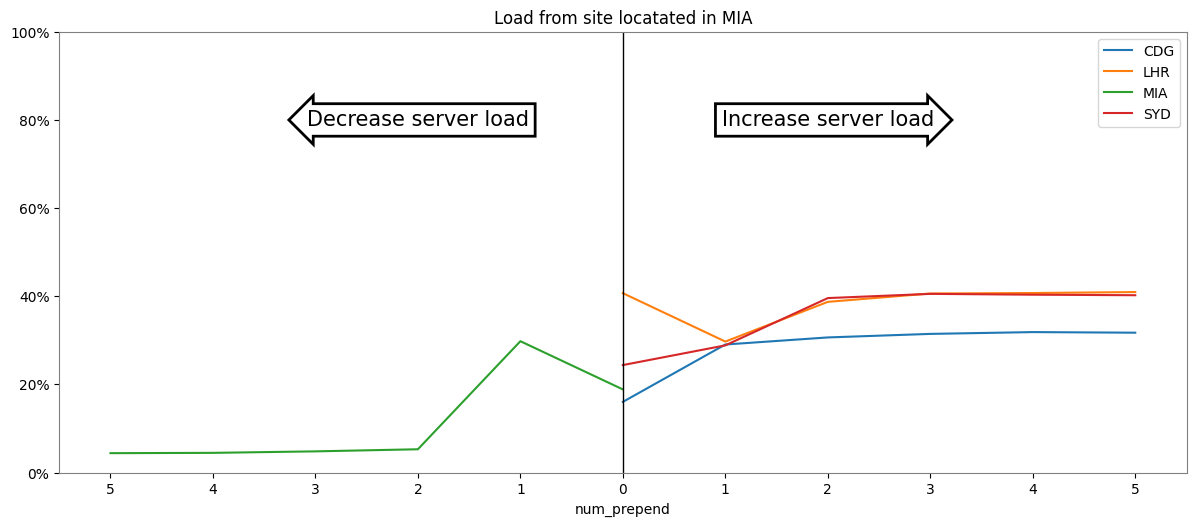

SYD


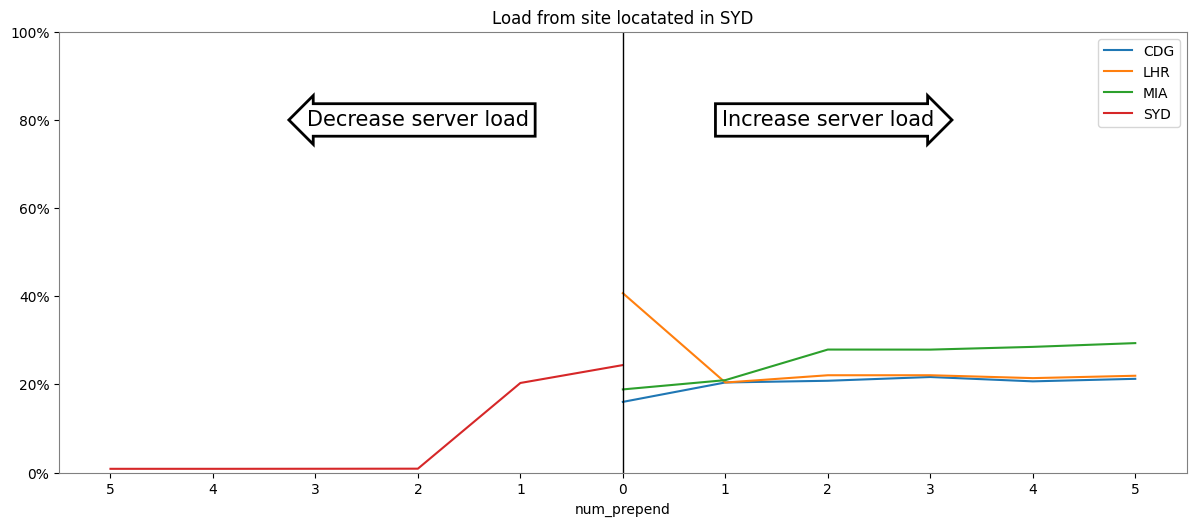

In [34]:
df = df_all
df[['num_prepend','loc_prepend']] = df.bgp.str.split("x",expand=True,)
df_prepend = df.groupby(['num_prepend','loc_prepend','site','bgp'])['percent'].max().reset_index()

for site in df_prepend.site.unique():
    print (site)
    df_site = df_prepend[df_prepend['site']==site]
    (fig,ax) = init_fig()
    for loc_prepend in df_site.loc_prepend.unique():
        df = df_site[(df_site['loc_prepend']==loc_prepend) & (df_site['num_prepend'].astype(int) <6)]  
        reference_value = df_all[(df_all['site']==loc_prepend) & (df_all['bgp']=="baseline")]['percent'].values[0]
        df = df.append([{ 'loc_prepend': loc_prepend, 'percent': reference_value, 'num_prepend': 0 }])
        df = df[['loc_prepend','percent','num_prepend']]
        df["num_prepend"] = df["num_prepend"].astype(int)#         print (reference_value)
        df.sort_values(by="num_prepend",inplace=True)
        if (loc_prepend == site):
            df['num_prepend'] = df['num_prepend'] * -1
        df.set_index('num_prepend',inplace=True)
        df = df[['loc_prepend','percent']]
        

        
#         ax.annotate("", xy=(0, 5), xytext=(2, 5), arrowprops=dict(arrowstyle="->"))
        df.plot(ax=ax)
        
    # remove negative values label from xticks
    def format_func(value, tick_number):
        return (int(abs(value*-1)))

    ax.xaxis.set_major_locator(plt.MaxNLocator(len(df)*2))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.legend(df_site.loc_prepend.unique().tolist())
    ax.axvline(x=0, color='black',linewidth=1)
    ax.set_title("Load from site locatated in {}".format(site));    
    ax.set_ylim(ymax=100,ymin=0);


    bbox_props = dict(boxstyle="larrow,pad=0.3", fc="white", ec="k", lw=2)
    ax.text(-2, 80, "Decrease server load", ha="center", va="center", rotation=0,size=15, bbox=bbox_props)
    bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=2)
    ax.text(2, 80, "Increase server load", ha="center", va="center", rotation=0,size=15, bbox=bbox_props)
    
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()]);

    plt.show()
 
 

---
---
<h1 align="center"> Radar Graph </h1>

---
---

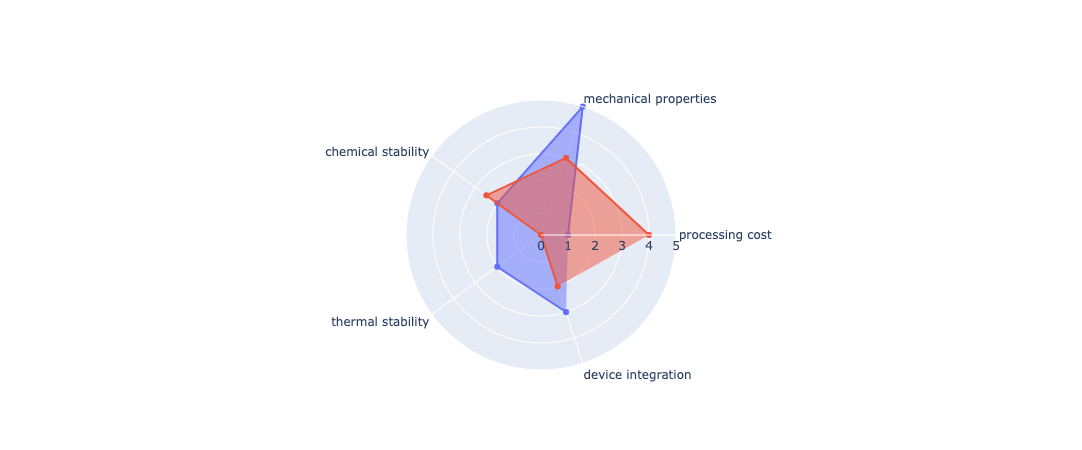

In [35]:
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly 

from plotly import exceptions
import plotly.figure_factory as ff

categories = ['processing cost','mechanical properties','chemical stability',
              'thermal stability', 'device integration']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1, 5, 2, 2, 3],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 2.5,0, 2],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5],
      side="clockwise",
      
    )),
  showlegend=False, 
)

fig.show()

In [36]:
df = df_all
site="CDG"
df_site = df[df.site==site]
# what is the influence of the MIAMI on CDG
bgp = "MIA"
df_site = df_site[df_site.bgp.str.contains(bgp)]


In [37]:
# df_site[~df_site.bgp.str.contains("baseline")]['percent']
df_site = df_site.sort_values('bgp')
df_site

site   count    percent    bgp num_prepend loc_prepend
3  CDG  432969  11.876827  1xMIA           1         MIA
2  CDG  563760  15.739520  2xMIA           2         MIA
2  CDG  567585  15.880804  3xMIA           3         MIA
2  CDG  570930  15.882315  4xMIA           4         MIA
2  CDG  565787  15.554419  5xMIA           5         MIA
1  CDG  837466  22.936476  6xMIA           6         MIA
2  CDG  563358  15.413579  7xMIA           7         MIA
2  CDG  567261  15.763884  8xMIA           8         MIA

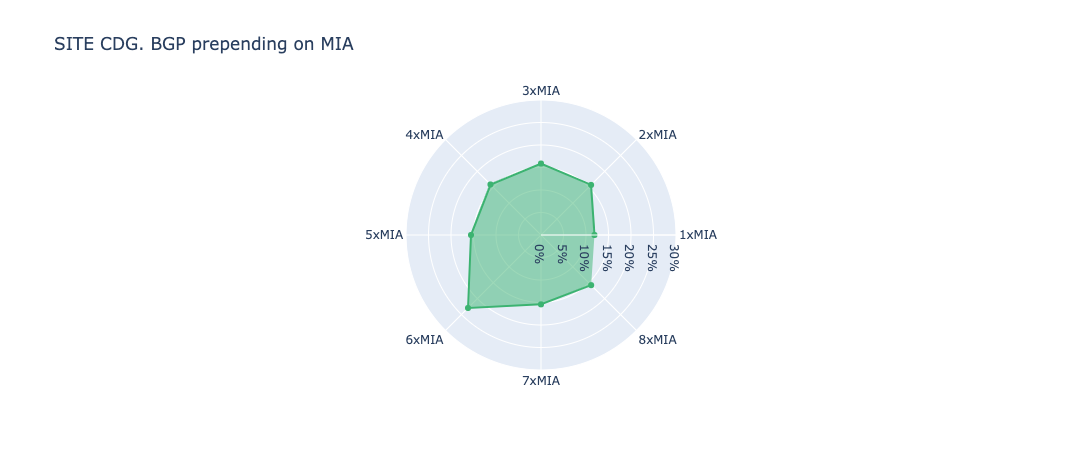

In [38]:

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
  r=df_site[~df_site.bgp.str.contains("baseline")]['percent'],
  theta=df_site[~df_site.bgp.str.contains("baseline")]['bgp'],
  fill='tonext',

  marker=dict(color="mediumseagreen"),
  name=bgp,
  
))

fig.update_layout(
    title = 'SITE CDG. BGP prepending on MIA',
  polar=dict(
    radialaxis=dict(
    visible=True,
    range=[0, 30],
    ticksuffix = "%",
    side = "clockwise", 
    )),
  showlegend=False
)
fig.show()

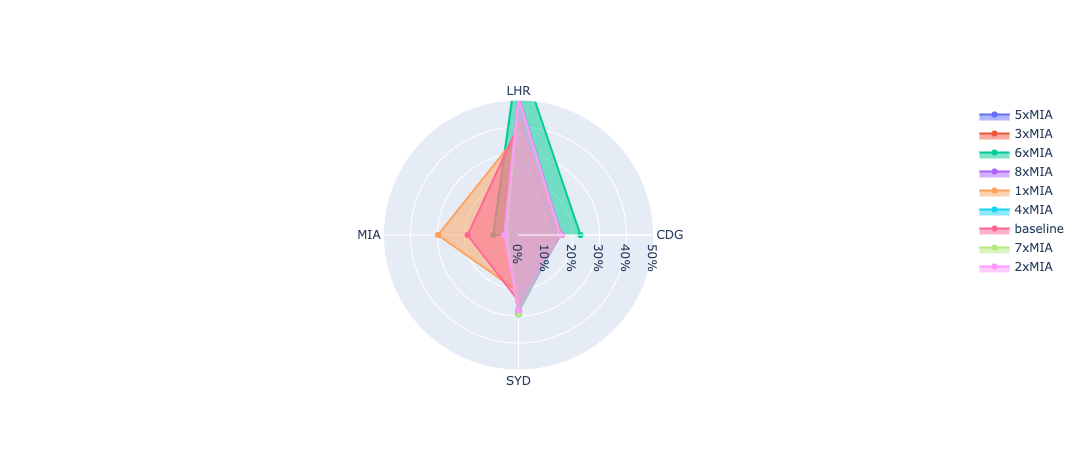

In [39]:
df = df_all
df.bgp.unique()
df = df[df.bgp.str.contains("baseline|MIA")]
# print (bgp)

fig = go.Figure()

for bgp in df.bgp.unique():
#     print (bgp)
    df_bgp = df[df.bgp==bgp]
    df_bgp = df_bgp.sort_values('site')
    fig.add_trace(
    go.Scatterpolar(
      r=df_bgp['percent'],
      theta=df_bgp['site'],
      fill='toself',
      name=bgp,
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      side="clockwise",
      range=[0, 50],
      ticksuffix = "%",
      
    )),
  showlegend=True, 
)
fig.show()

2xCDG


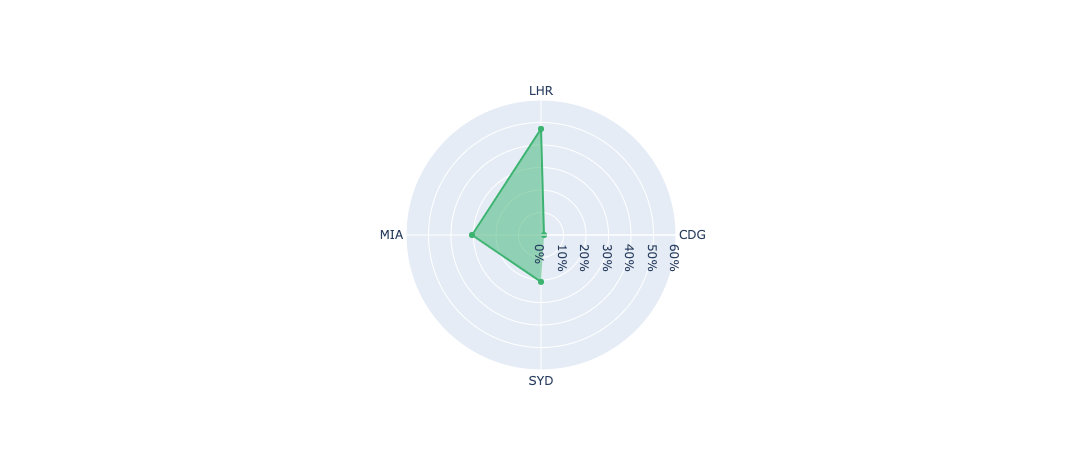

5xMIA


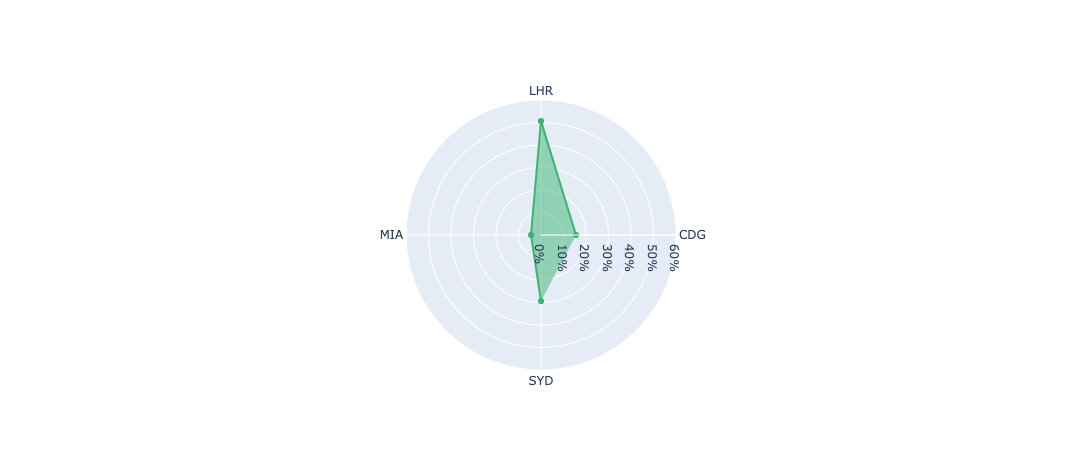

6xSYD


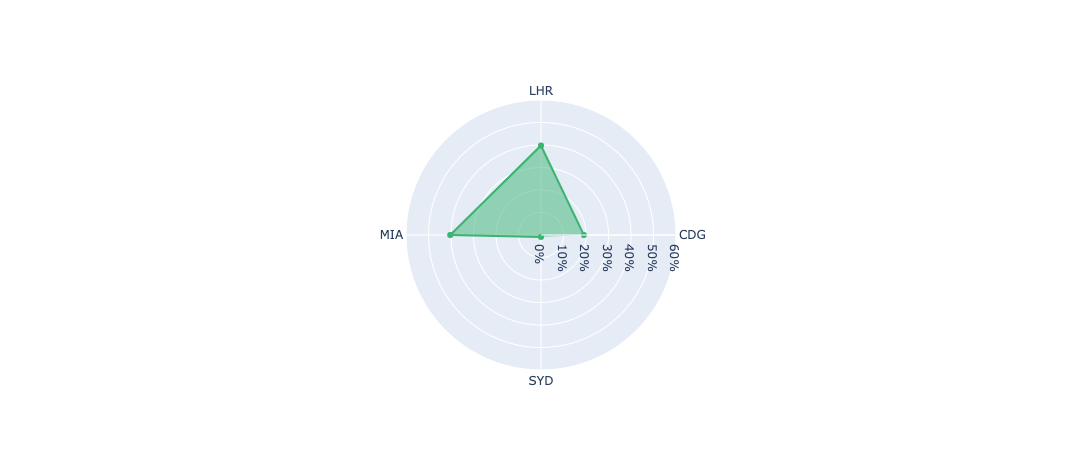

3xSYD


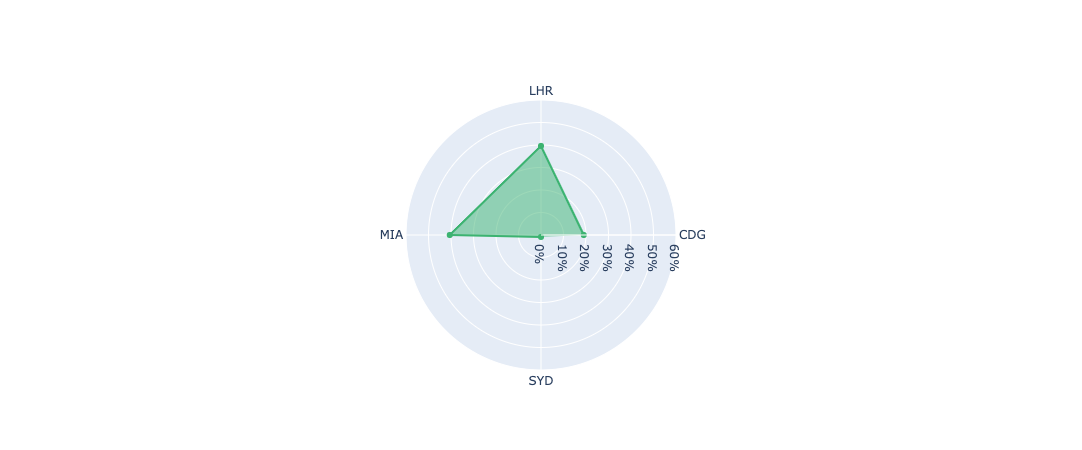

2xLHR


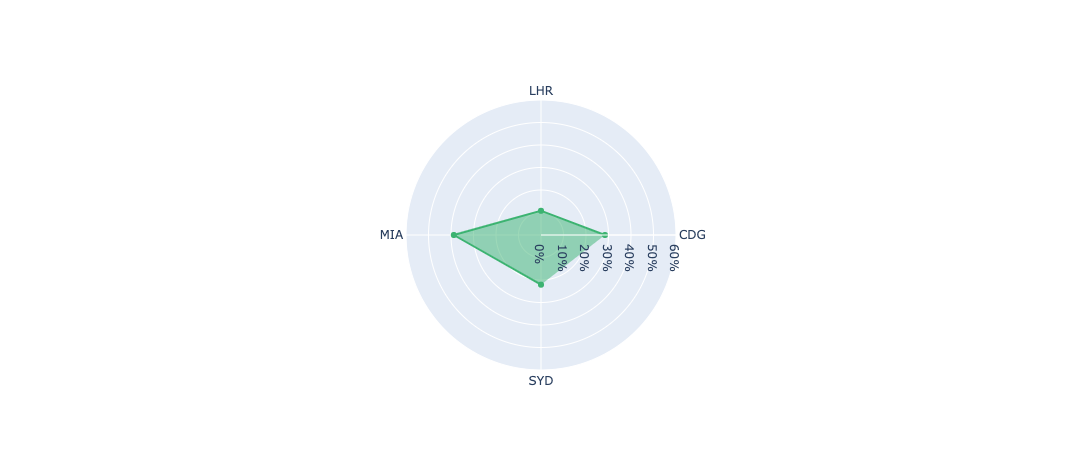

4xCDG


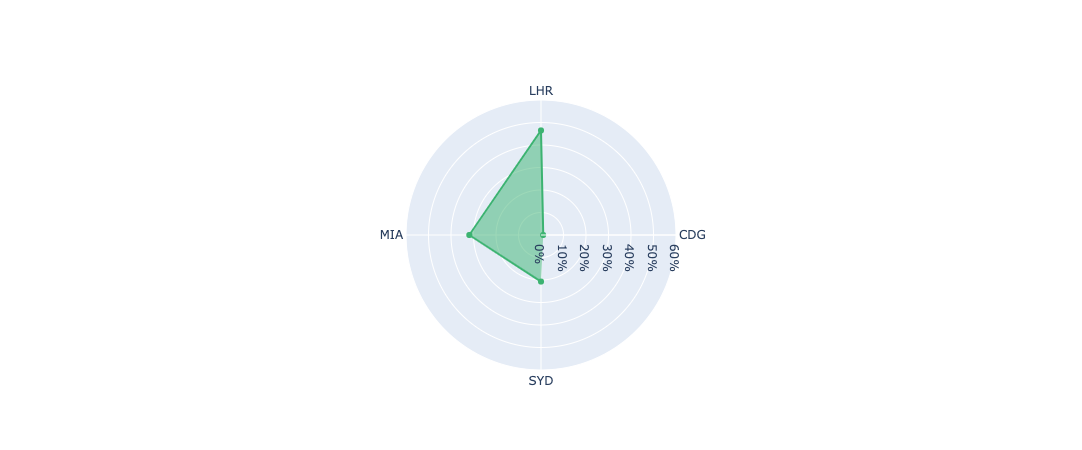

1xLHR


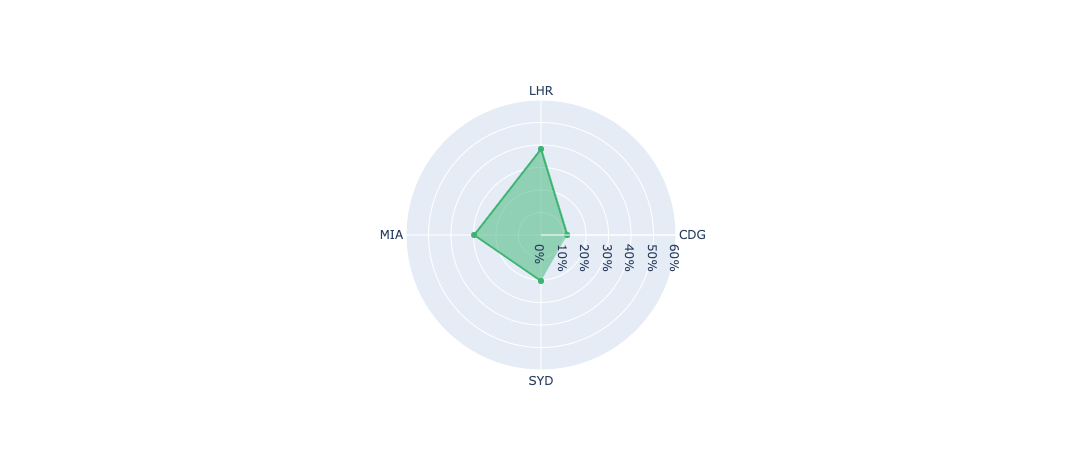

3xMIA


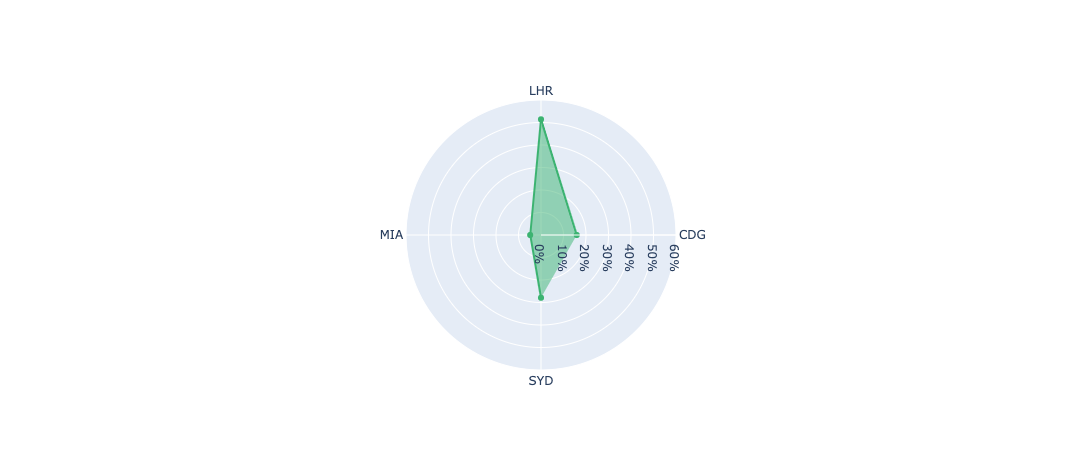

5xSYD


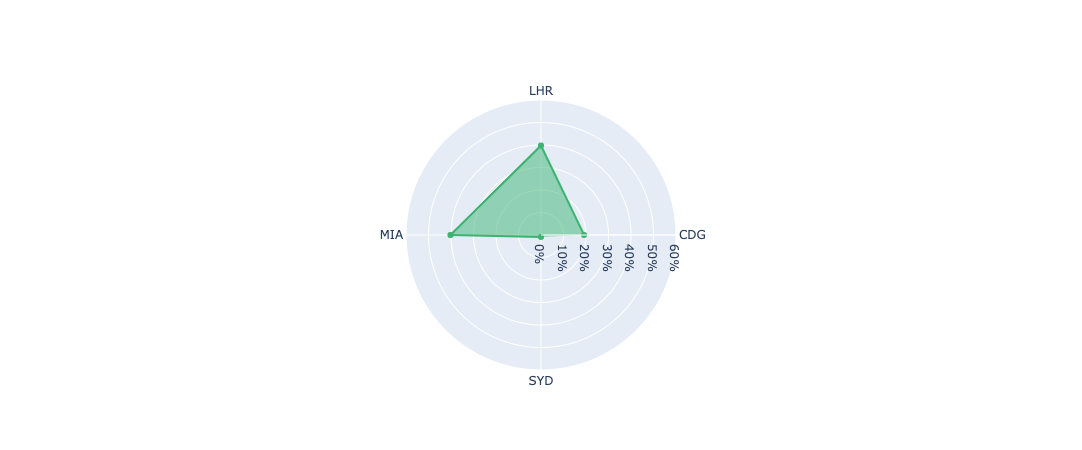

6xMIA


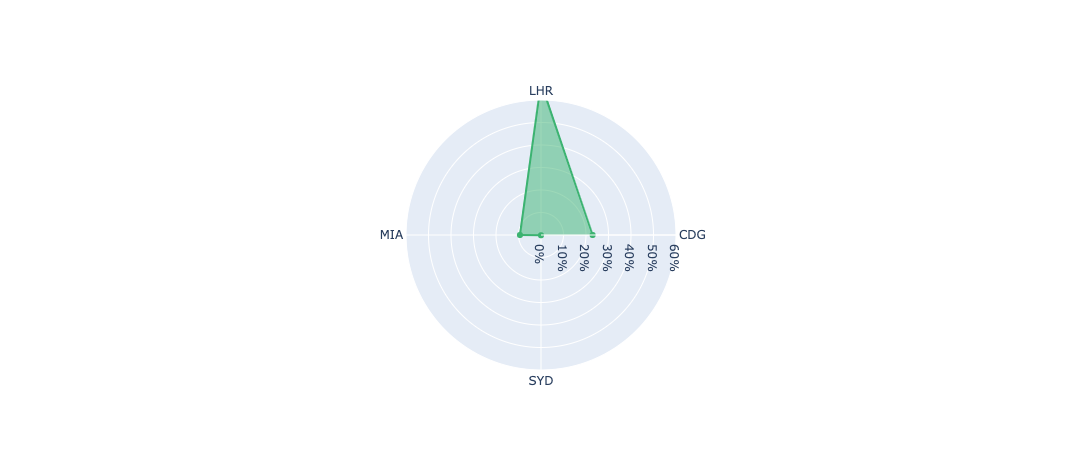

1xCDG


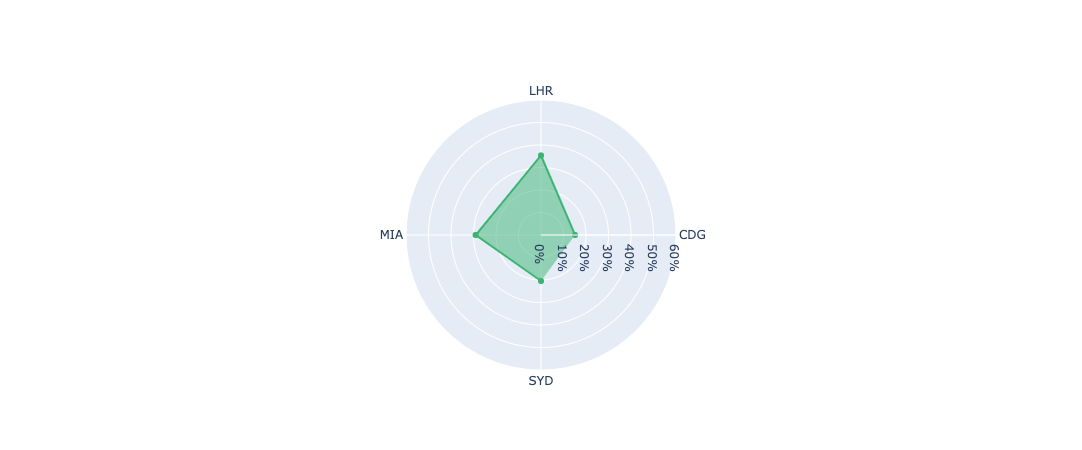

4xLHR


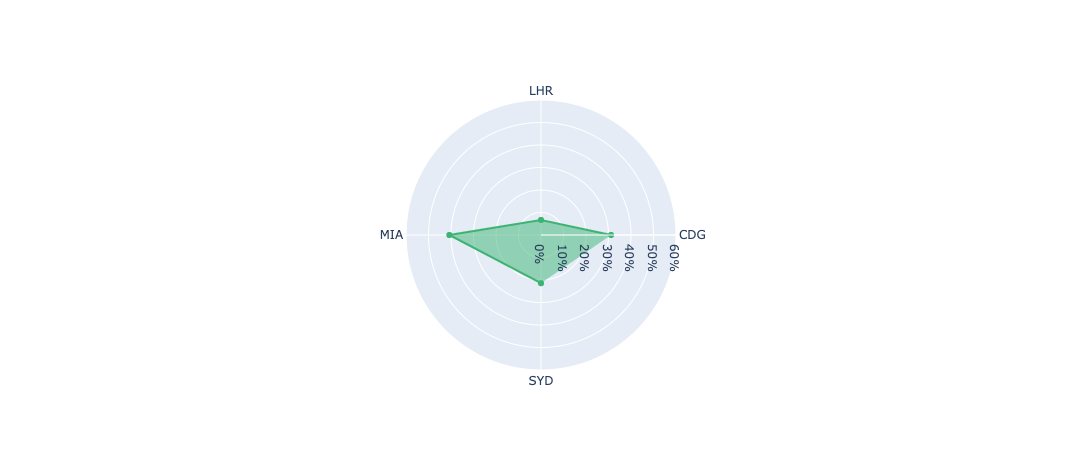

8xMIA


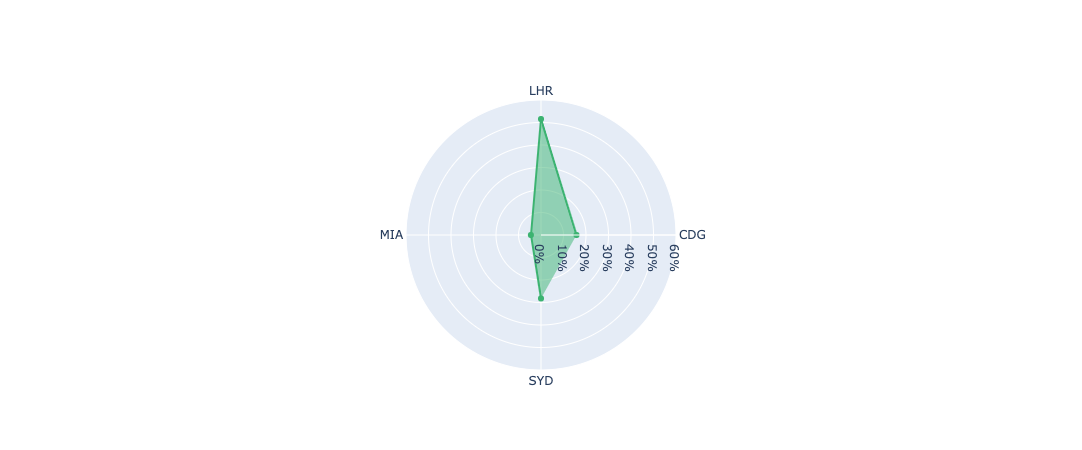

3xLHR


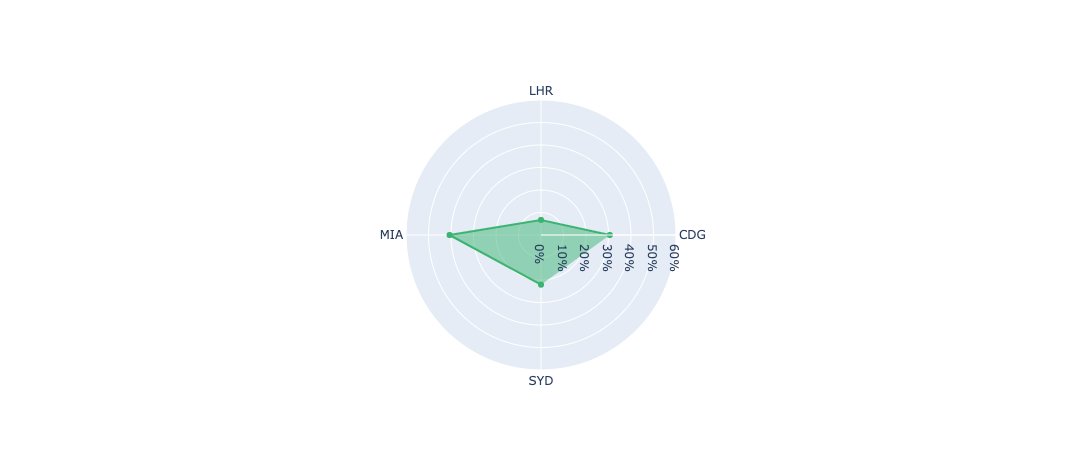

2xSYD


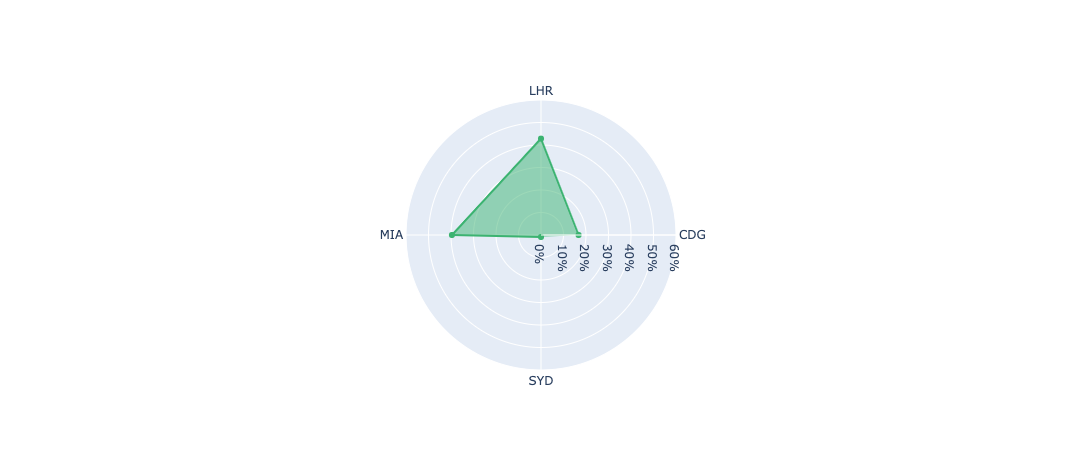

1xMIA


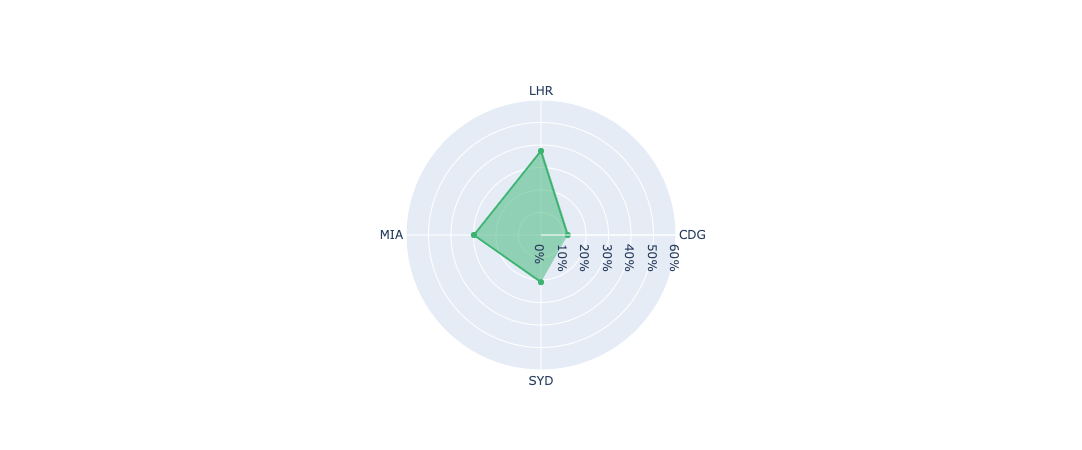

7xSYD


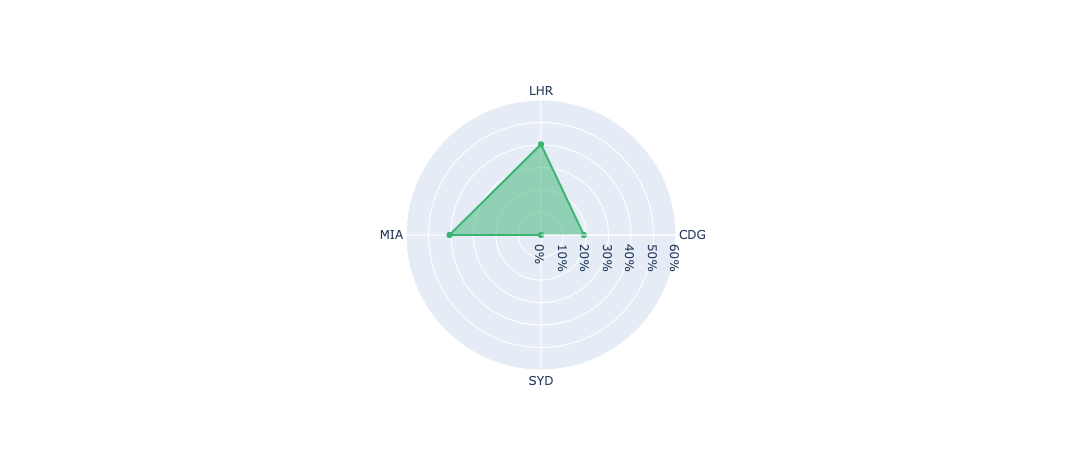

4xMIA


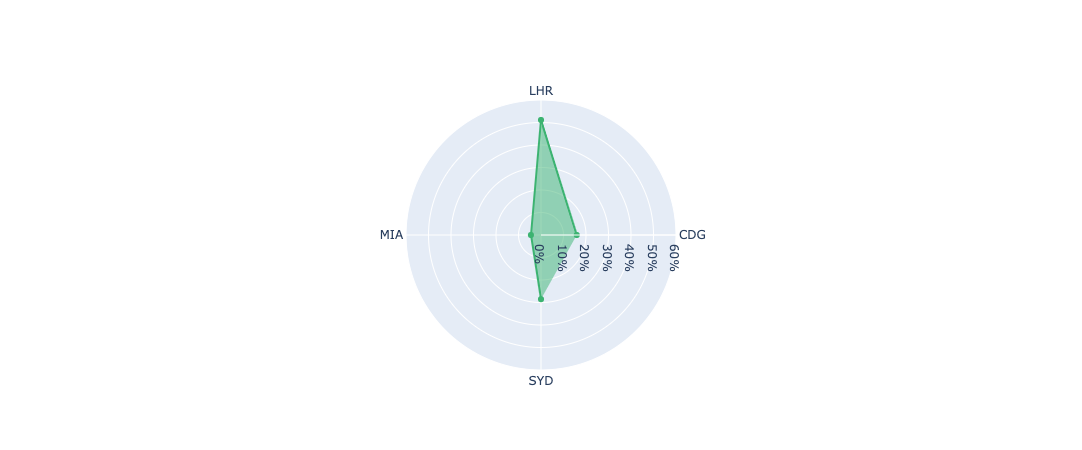

3xCDG


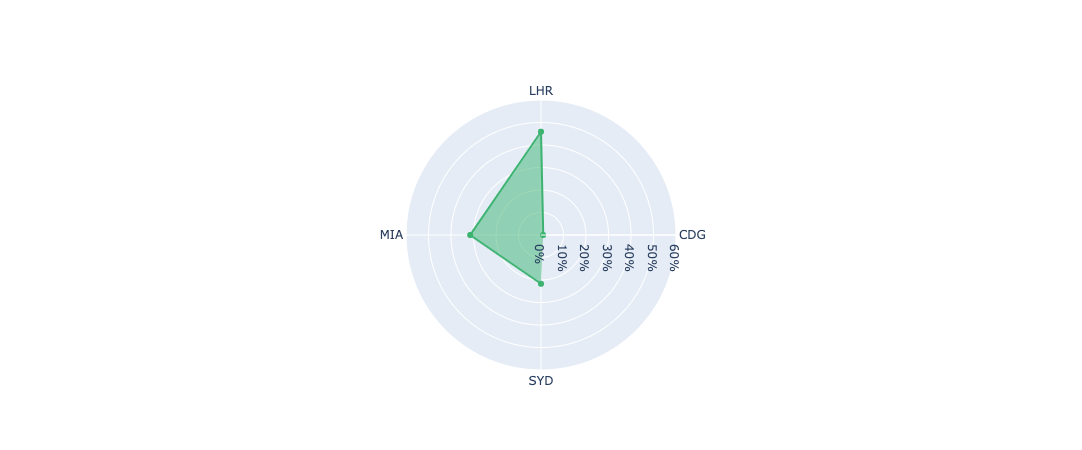

5xLHR


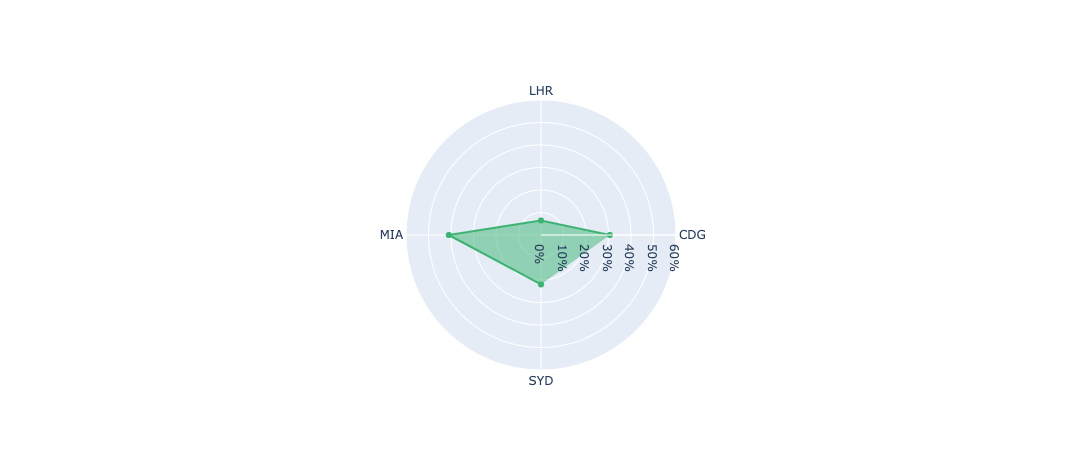

baseline


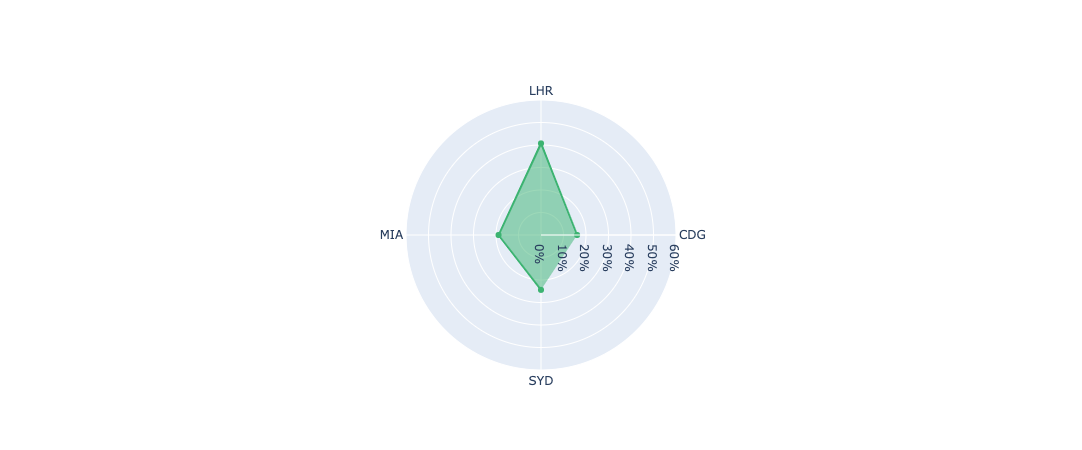

7xMIA


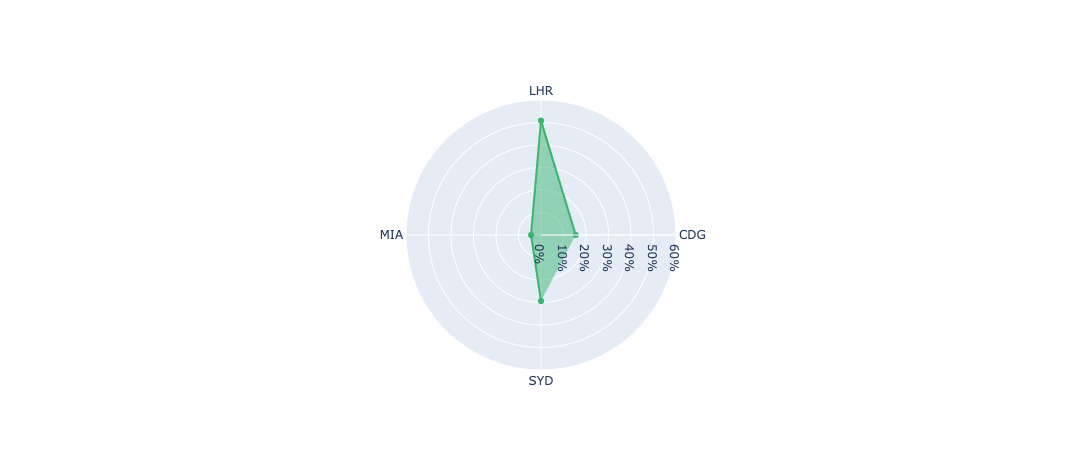

4xSYD


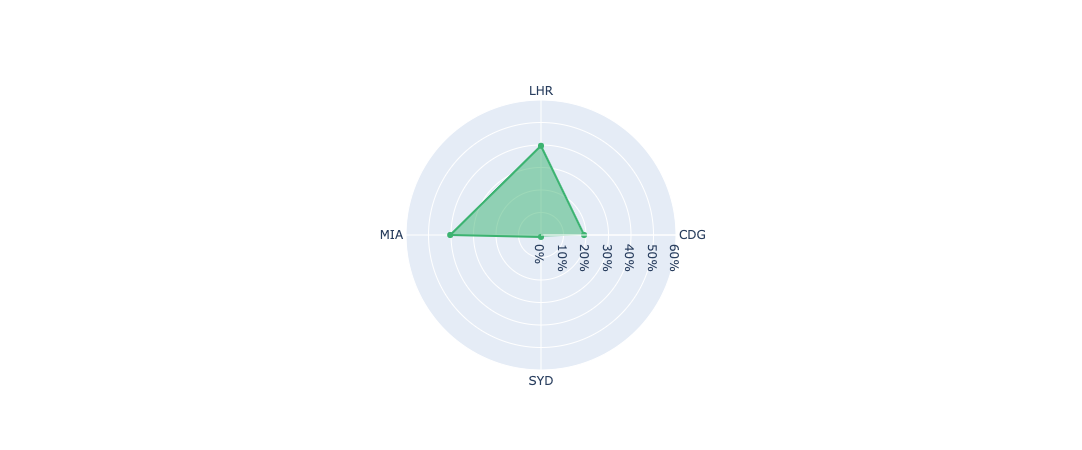

2xMIA


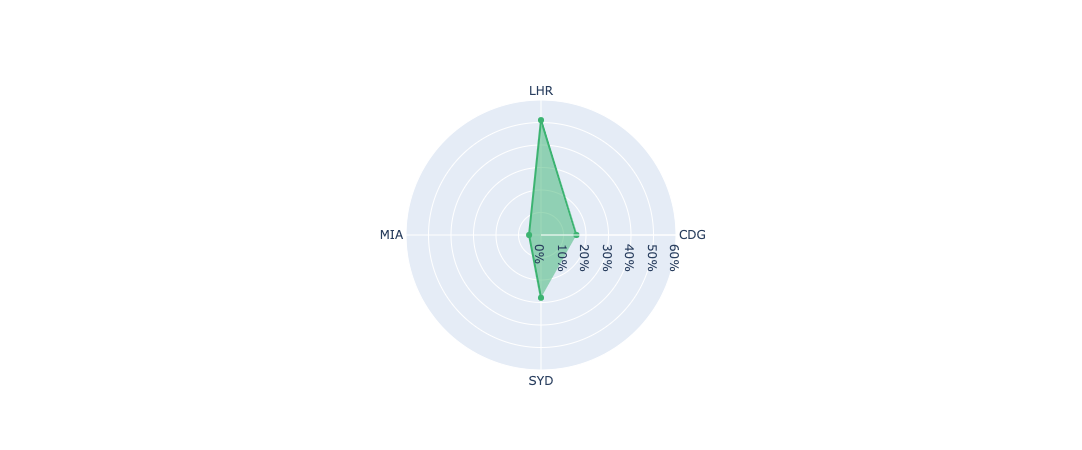

1xSYD


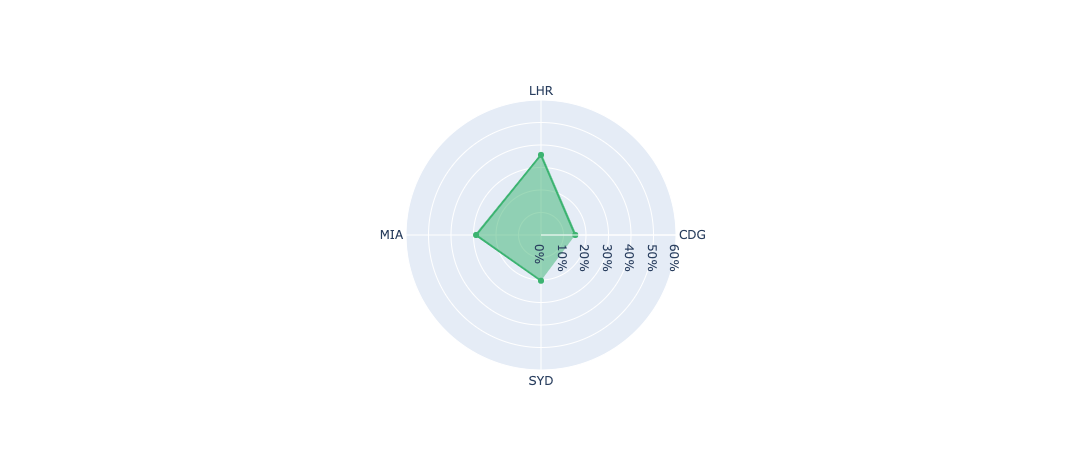

8xSYD


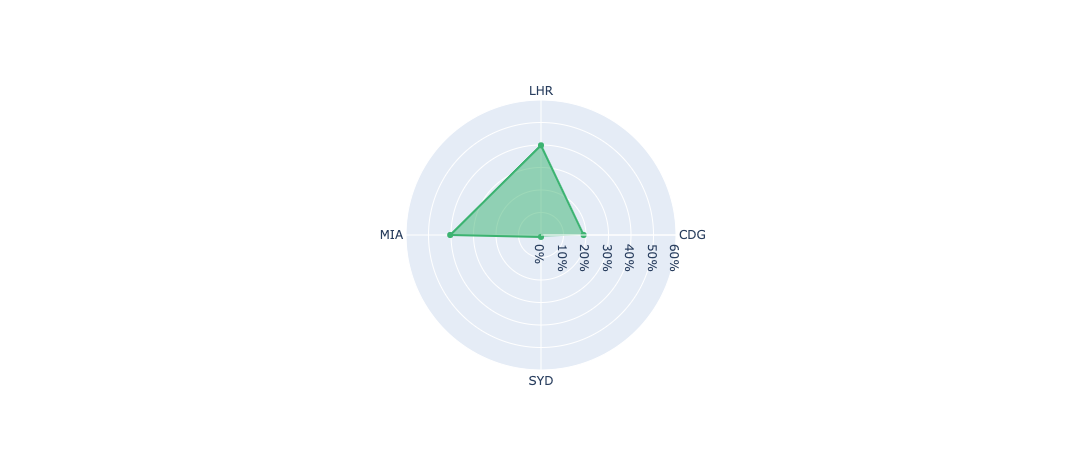

5xCDG


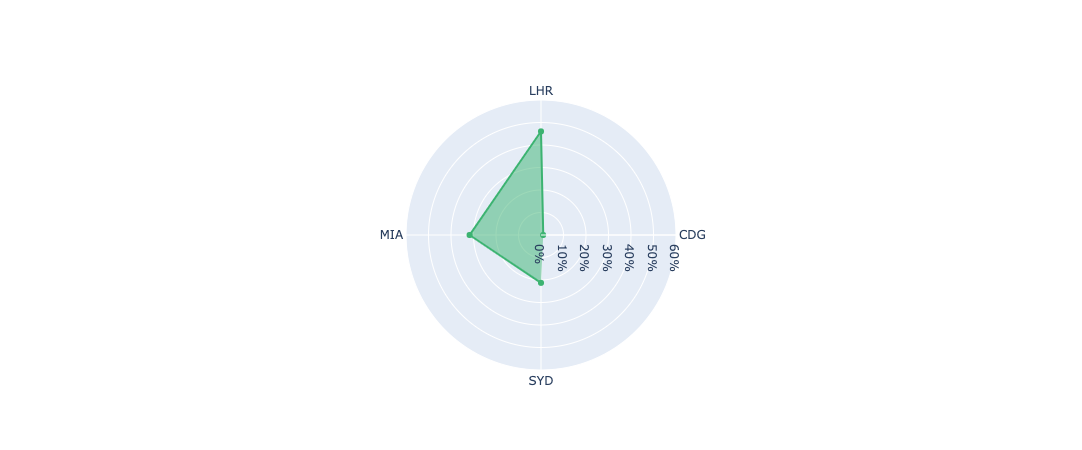

In [40]:

df = df_all
for bgp in df.bgp.unique():
    print (bgp)
    
    fig = go.Figure()

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, 60],
        ticksuffix = "%",
#         title = "teste",
        )),
      showlegend=False
    )
    df_bgp = df[df.bgp==bgp]
    df_bgp = df_bgp.sort_values('site')

    fig.add_trace(go.Scatterpolar(
          r=df_bgp['percent'],
          theta=df_bgp['site'],
          fill='toself',
          marker=dict(color="mediumseagreen"),

          name=bgp,
    ))
    fig.show()

---
---
<h1 align="center"> Degrees of control of each site </h1>

---
---

In [41]:
def bins_and_edges(df, variable,bin_size):
 """
     split the variable in chunks and group based on the bin size
 """    
 bins = list (range(0,100,bin_size))
 print(bins)
 df['binned'] = pd.cut(df[variable], bins)
 return (df)

In [42]:
def print_edges(df,bin_size,variable):
    
    # all xlabels
    all_markers = df.index.to_list()
    
    # bin the dataframe
    bins = list (range(0,100,bin_size))
    df['binned'] = pd.cut(df[variable], bins)  
    
    # list of edges
    list_edges =[]
    # find the eages of each group
    first = df.drop_duplicates('binned', keep="first") 
    last = df.drop_duplicates('binned', keep="last") 
    markers = pd.concat([first,last]).reset_index()['bgp'].to_list()

    # translate label to xlabel index
    list_index = []
    for xlabel in  markers: 
        index = all_markers.index(xlabel)
        list_index.append(index)
    list_index.sort()
    
    counter = 0
    label_counter = 0
    previous = 0
    for index in list_index:

        previous = list_index[counter-1]
        current = list_index[counter]
        if (counter == 0):
            previous = 0

#         print ("[{} - {}] ".format(previous,current))
        
        initial = previous
        last = current

        edges = { "initial": initial,
                  "final":  last,
        }
        list_edges.append(edges)

        if (initial == last):
            counter+=1
            continue
            
        if (label_counter % 2) == 0:
            color = "gray"
            position = 50
        else:
            color = "red"
            position = 50

        counter+=1     
        
        # print area
        ax.fill_betweenx([0,100], initial, last, facecolor=color,alpha=0.1, linestyle='dotted')
        
        # print border
        ax.axvline(x=index, color='grey',linewidth=0.8,linestyle='dotted')
        
        # label position
        middle = (last-initial)/2 + initial
        
        label_counter+=1
        label = "degree {}".format(label_counter)
        ax.annotate(label,
                     xy=(middle, position),
                     rotation=90,
                     color='black',
                     horizontalalignment='left', 
                     va='bottom') 
    return list_edges

## DEGREES OF CONTROL

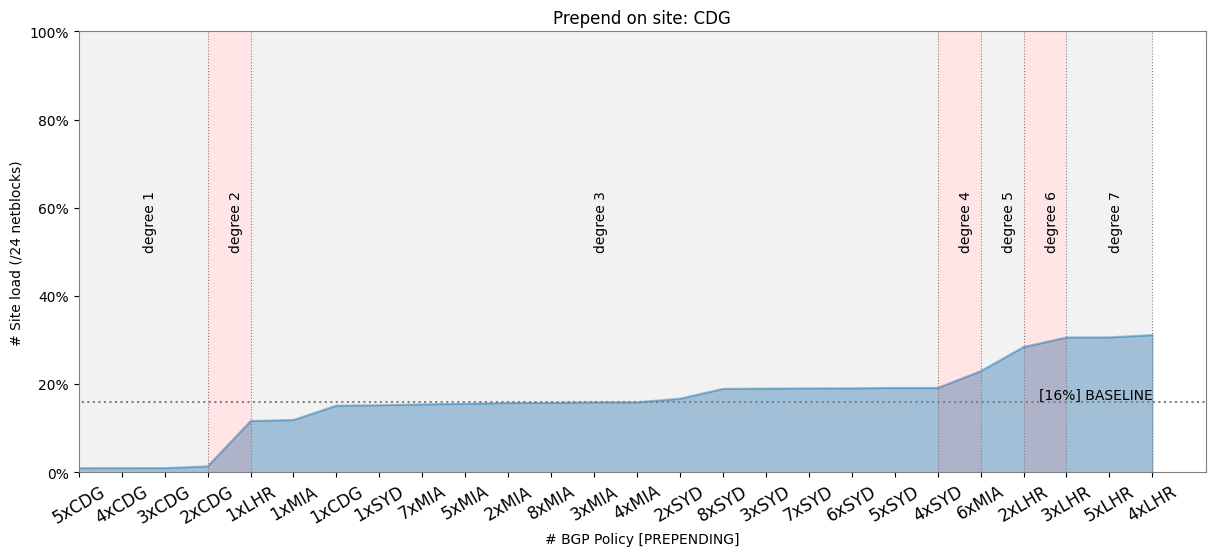

In [43]:
df = df_all
df_site = df[df['site']=="CDG"].sort_values(by="bgp")
df_site=df_site[~df_site.bgp.str.contains('baseline')]
data = df_site[["percent","bgp"]] 
data.set_index('bgp',inplace=True)
data = data.sort_values(by="percent")

# FIGURE
(fig,ax) = init_fig()
data['percent'].plot(ax=ax, kind='area', alpha=.4)

# Xticks
xlabels = data.index.get_level_values(0).tolist()
ax.xaxis.set_tick_params(labelsize=12)
ax.set_ylim(ymax=100);
ax.set_xlim(xmin=0);
plt.xticks(np.arange(len(data)), xlabels, rotation=30)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()]) 

# labels
ax.set_xlabel('# BGP Policy [PREPENDING]');
ax.set_ylabel('# Site load (/24 netblocks)');
ax.set_title("Prepend on site: {}".format(site))


# REFERENCE LINE
get_and_plot_reference_value(df,"CDG")

# FILL EDGES AREA
list_edges = print_edges(data,10,'percent')
# print (list_edges)
plt.show()

# ALL nodes

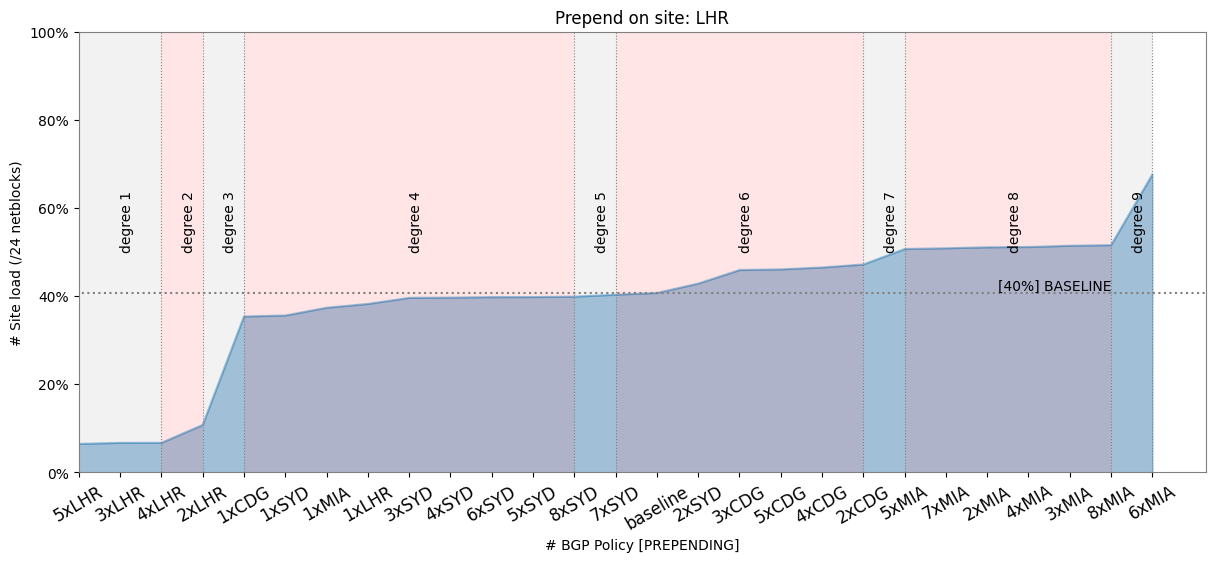

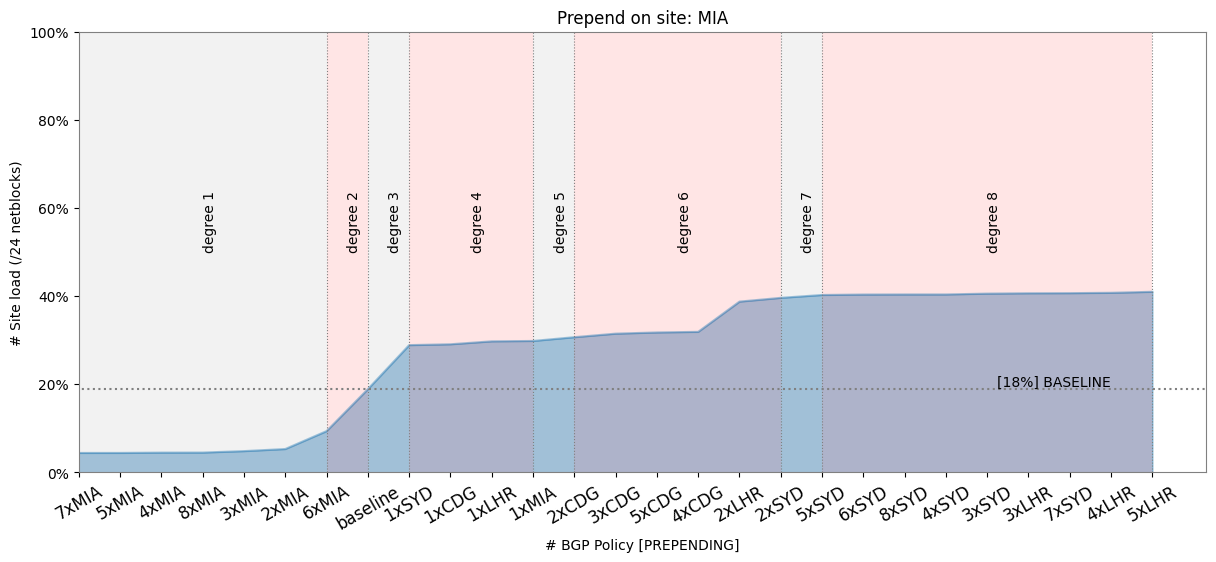

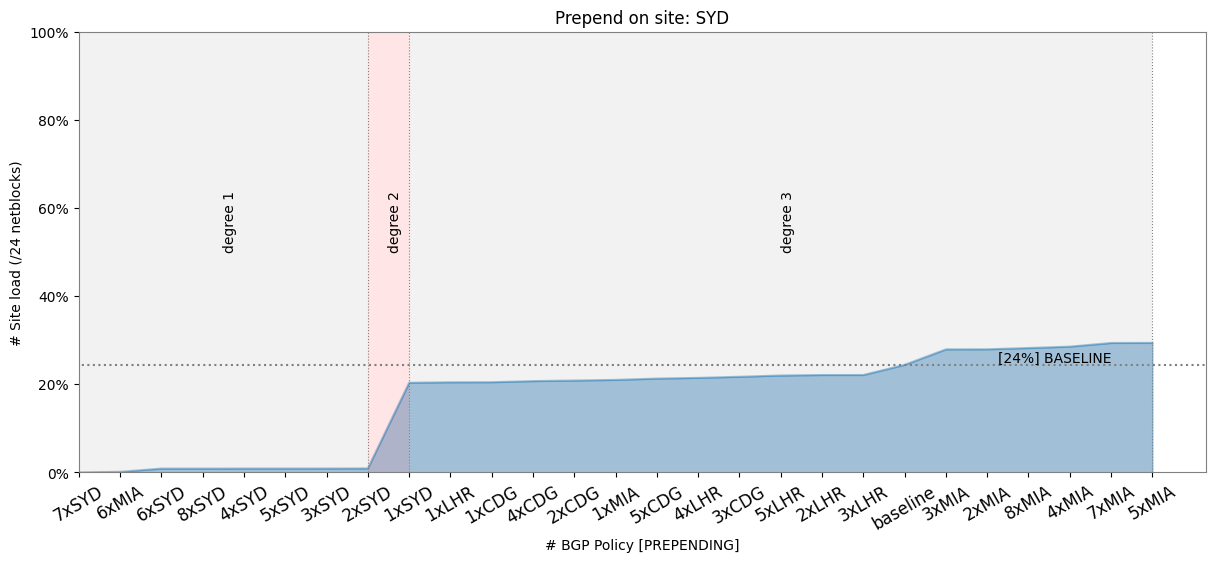

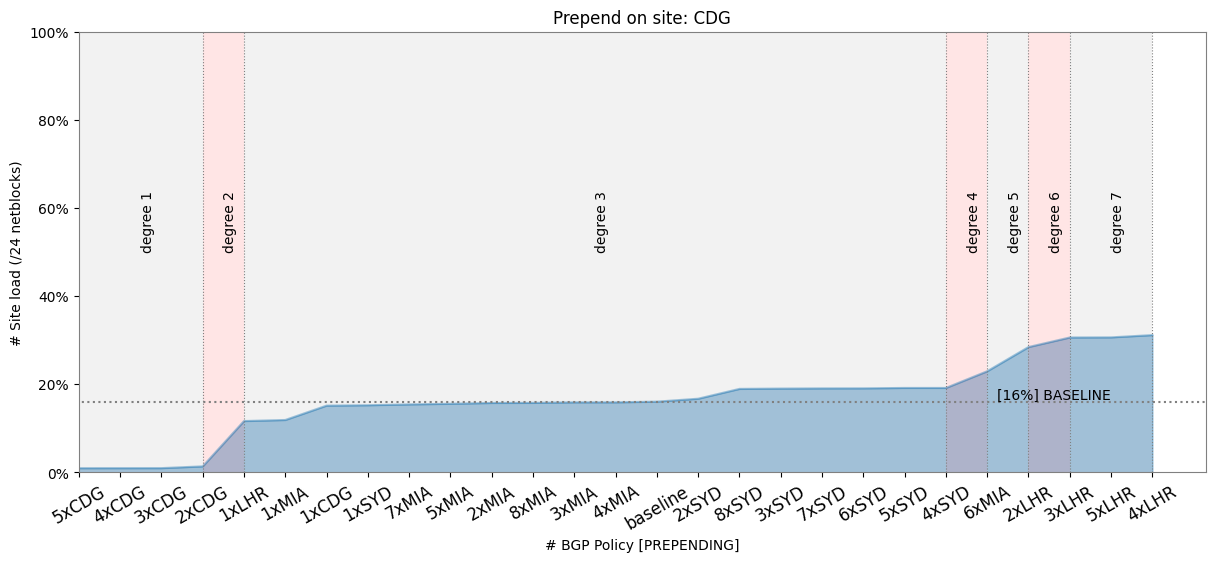

In [44]:
df = df_all
for site in df.site.unique():
    
    df_site = df[df['site']==site].sort_values(by="bgp")
#     df_site=df_site[~df_site.bgp.str.contains('baseline')]
    data = df_site[["percent","bgp"]] 
    data.set_index('bgp',inplace=True)
    data = data.sort_values(by="percent")
    
    # FIGURE
    (fig,ax) = init_fig()
    data['percent'].plot(ax=ax, kind='area', alpha=.4)

    # Xticks
    xlabels = data.index.get_level_values(0).tolist()
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_ylim(ymax=100);
    ax.set_xlim(xmin=0);
    plt.xticks(np.arange(len(data)), xlabels, rotation=30)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()]) 

    # labels
    ax.set_xlabel('# BGP Policy [PREPENDING]');
    ax.set_ylabel('# Site load (/24 netblocks)');
    ax.set_title("Prepend on site: {}".format(site))


    # REFERENCE LINE
    get_and_plot_reference_value(df,site)

    # FILL EDGES AREA
    list_edges = print_edges(data,10,'percent')
    # print (list_edges)
    plt.show()
# how much traffic can I shift 
# can i shift a partial traffic?

# degrees of control histogram

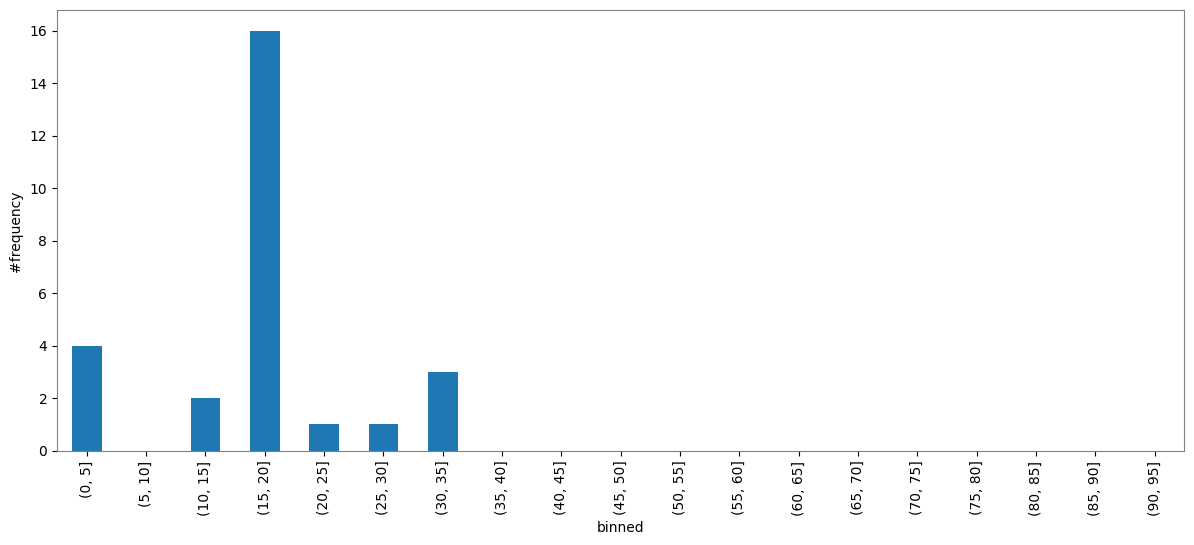

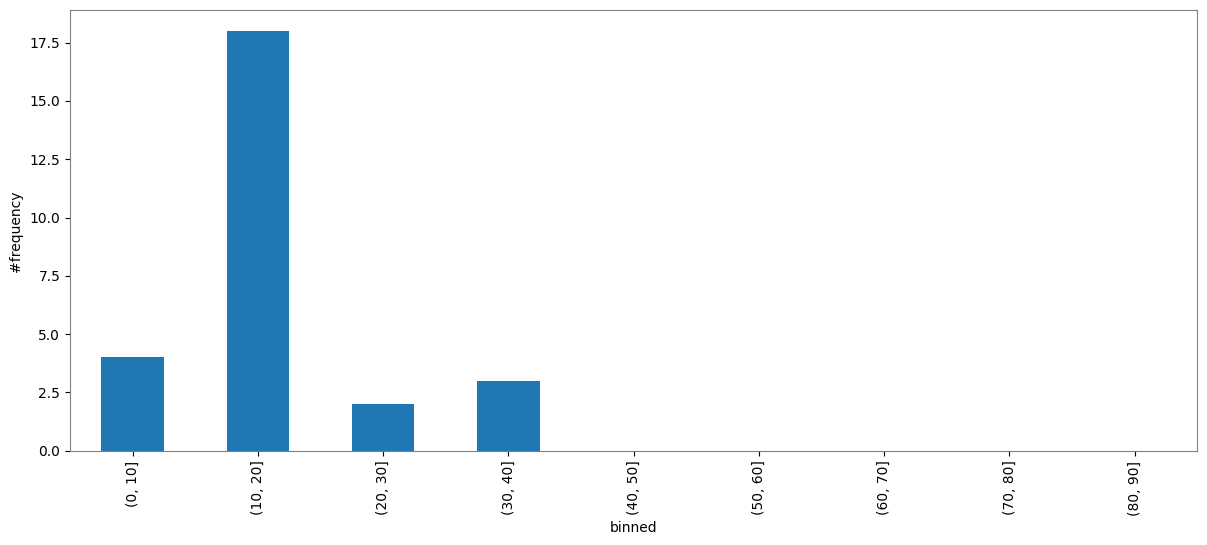

In [45]:
for degrees_of_control in [5,10]:

    bins = list (range(0,100,degrees_of_control))
    data['binned'] = pd.cut(data['percent'], bins)
    (fig,ax) = init_fig()
    data.groupby('binned').size().plot(kind="bar",ax=ax)

    # xlabel
    label = '#frequency '.format(degrees_of_control)
    ax.set_ylabel(label);
# ax.set_ylabel('# Site load (/24 netblocks)');

In [46]:
data.groupby('binned').size()

binned
(0, 10]      4
(10, 20]    18
(20, 30]     2
(30, 40]     3
(40, 50]     0
(50, 60]     0
(60, 70]     0
(70, 80]     0
(80, 90]     0
dtype: int64

# LOSS investigation